In [3]:
import requests
import pandas as pd
import time
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from keras.models import Sequential
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
api_key = "RGAPI-34771202-368a-44ab-99fb-1cd2d1257bfe"

In [7]:
api_url = "https://euw1.api.riotgames.com/lol/summoner/v4/summoners/by-name/spedy?api_key=RGAPI-77d55d1a-c63b-4831-9640-c4b5118a14b1"

In [261]:
#if more arguments are needed so key can't be the argument
#api_url = api_url "&api_key=" + api_key

In [8]:
response = requests.get(api_url)

In [15]:
def get_puuid(summoner_name, region, api_key):
    api_url = (
        "https://" + 
        region +
        ".api.riotgames.com/lol/summoner/v4/summoners/by-name/" +
        summoner_name +
        "?api_key=" +
        api_key
    )
    
    print(api_url)
    
    resp = requests.get(api_url)
    player_info = resp.json()
    puuid = player_info['puuid']
    return puuid  

In [16]:
#dzuwu
#Wind19
#Alisa Pauder
summoner_name = "spedy"
#summoner_name = "Alisa Pauder"
region = 'euw1'
#region = "RU"

puuid = get_puuid(summoner_name, region, api_key)
puuid

https://euw1.api.riotgames.com/lol/summoner/v4/summoners/by-name/spedy?api_key=RGAPI-34771202-368a-44ab-99fb-1cd2d1257bfe


'NxyfJX9y3qA4eNYeKkAJgFJNDpXHH3mOoEml4C6_oRyRzlVC7GU1ItLAmaSjR9zoVmU5gXqYynI1pg'

In [17]:
# The function to get a list of all the match IDs (2nd example above) given a players puuid and mass region
def get_match_ids(puuid, mass_region, no_games, queue_id, api_key):
    api_url = (
        "https://" +
        mass_region +
        ".api.riotgames.com/lol/match/v5/matches/by-puuid/" +
        puuid + 
        "/ids?start=0" + 
        "&count=" +
        str(no_games) + 
        "&queue=" + 
        str(queue_id) + 
        "&api_key=" + 
        api_key
    )
    
    print(api_url)
    
    resp = requests.get(api_url)
    match_ids = resp.json()
    return match_ids   

In [18]:
#https://europe.api.riotgames.com/lol/match/v5/matches/by-puuid/NxyfJX9y3qA4eNYeKkAJgFJNDpXHH3mOoEml4C6_oRyRzlVC7GU1ItLAmaSjR9zoVmU5gXqYynI1pg/ids?type=ranked&start=0&count=20&api_key=RGAPI-9e3d577f-dddc-469b-82c8-ac466695a9fd

In [19]:
# EUW1 is Europe West region, part of the EUROPE mass region
queue_id = 420
no_games = 100

#EUROPE
#mass_region = "ASIA"
mass_region = "EUROPE"

match_ids = get_match_ids(puuid, mass_region, no_games, queue_id, api_key)
match_ids

https://EUROPE.api.riotgames.com/lol/match/v5/matches/by-puuid/NxyfJX9y3qA4eNYeKkAJgFJNDpXHH3mOoEml4C6_oRyRzlVC7GU1ItLAmaSjR9zoVmU5gXqYynI1pg/ids?start=0&count=100&queue=420&api_key=RGAPI-34771202-368a-44ab-99fb-1cd2d1257bfe


['EUW1_6340041619',
 'EUW1_6339984364',
 'EUW1_6339942566',
 'EUW1_6338526016',
 'EUW1_6338480172',
 'EUW1_6338438176',
 'EUW1_6338400888',
 'EUW1_6338356379',
 'EUW1_6337175059',
 'EUW1_6337133589',
 'EUW1_6337072055',
 'EUW1_6336916303',
 'EUW1_6336890872',
 'EUW1_6336857664',
 'EUW1_6336211770',
 'EUW1_6336134195',
 'EUW1_6336062238',
 'EUW1_6335854315',
 'EUW1_6335783467',
 'EUW1_6335726333',
 'EUW1_6335689830',
 'EUW1_6335641180',
 'EUW1_6335599060',
 'EUW1_6334417947',
 'EUW1_6334357044',
 'EUW1_6334207486',
 'EUW1_6334176520',
 'EUW1_6334123275',
 'EUW1_6334078402',
 'EUW1_6334046052',
 'EUW1_6326602122',
 'EUW1_6326534136',
 'EUW1_6326379033',
 'EUW1_6326315146',
 'EUW1_6326263175',
 'EUW1_6326219721',
 'EUW1_6325387783',
 'EUW1_6325287016',
 'EUW1_6325236605',
 'EUW1_6325053536',
 'EUW1_6325020530',
 'EUW1_6324970883',
 'EUW1_6324928022',
 'EUW1_6324872985',
 'EUW1_6324838547',
 'EUW1_6324800038',
 'EUW1_6324773601',
 'EUW1_6324734670',
 'EUW1_6324668863',
 'EUW1_6323879194',


In [20]:
# From a given match ID and mass region, get the data about the game
def get_match_data(match_id, mass_region, api_key):
    api_url = (
        "https://" + 
        mass_region + 
        ".api.riotgames.com/lol/match/v5/matches/" +
        match_id + 
        "?api_key=" + 
        api_key
    )
    
    #we need to add this "while" statement so that we continuously loop until it's successful
    while True:
        resp = requests.get(api_url)
        
        #whenever we see a 429, we sleep for 10 seconds and then restart from the top of the "while" loop
        if resp.status_code == 429:
            print("Rate Limit hit, sleeping for 10 seconds")
            time.sleep(10)
            # continue means start the loop again
            continue
            
        #if resp.status_code isn't 429, then we carry on to the end of the function and return the data
        match_data = resp.json()
        return match_data       

In [21]:
#Rate limit test, tager ca 2 min a køre
#for i in range(101):
    #print("Attempt:", i)
    #get_match_data(match_id, mass_region, api_key)

In [22]:
match_id = match_ids[0]
match_data = get_match_data(match_id, mass_region, api_key)
#match_data

In [23]:
def get_match_timeline(match_id, mass_region, api_key):
    api_url = (
        "https://" + 
        mass_region + 
        ".api.riotgames.com/lol/match/v5/matches/" +
        match_id + 
        "/timeline" +
        "?api_key=" + 
        api_key
    )
    # we need to add this "while" statement so that we continuously loop until it's successful
    while True:
        resp = requests.get(api_url)
        
        # whenever we see a 429, we sleep for 10 seconds and then restart from the top of the "while" loop
        if resp.status_code == 429:
            print("Rate Limit hit, sleeping for 10 seconds")
            time.sleep(10)
            # continue means start the loop again
            continue
            
        # if resp.status_code isn't 429, then we carry on to the end of the function and return the data
        match_timeline = resp.json()
        return match_timeline  

In [24]:

match_timeline = get_match_timeline(match_id, mass_region, api_key)
#match_timeline

In [30]:
#dictionary so we can use .keys
match_timeline.keys()
match_timeline["info"].keys()

dict_keys(['frameInterval', 'frames', 'gameId', 'participants'])

In [31]:
match_timeline["info"]["frames"][-1]["events"][-1]#["teamId"]

{'gameId': 6286817311,
 'realTimestamp': 1676920087217,
 'timestamp': 2466822,
 'type': 'GAME_END',
 'winningTeam': 200}

In [25]:
#match_timeline["info"]["frames"][4]#["participantFrames"]["10"]

In [33]:
###############################################################################################################################
##########################################################DATASET START########################################################
###############################################################################################################################

In [48]:
features_by_match = {}
for match_id in match_ids:
    match_timeline = get_match_timeline(match_id, mass_region, api_key)
    match_features = {"buildingType": [], "laneType": [], "tower_teamId": [],"tower_time": []}
    for i in range(len(match_timeline["info"]["frames"])):
        for k in range(len(match_timeline["info"]["frames"][i]["events"])):
            event = match_timeline["info"]["frames"][i]["events"][k]
            type1 = event.get("type")
            if "BUILDING_KILL" in type1:
                match_features["buildingType"].append(event.get("buildingType"))
                match_features["laneType"].append(event.get("laneType"))
                match_features["tower_teamId"].append(event.get("teamId"))
                #match_features["type"].append(event.get("type"))
                match_features["tower_time"].append(round(event.get("timestamp")/60000, 2))
    features_by_match[match_id] = match_features


In [49]:
df_features_by_match = pd.DataFrame(features_by_match)
df_features_by_match = df_features_by_match.T
df_features_by_match

,buildingType,laneType,tower_teamId,tower_time
EUW1_6282075543,"[TOWER_BUILDING, TOWER_BUILDING, TOWER_BUILDIN...","[MID_LANE, TOP_LANE, BOT_LANE, TOP_LANE, TOP_L...","[200, 200, 200, 200, 100, 200, 200, 200, 200, ...","[15.71, 15.74, 16.84, 17.96, 19.24, 20.75, 20...."
EUW1_6282018050,"[TOWER_BUILDING, TOWER_BUILDING, TOWER_BUILDIN...","[TOP_LANE, BOT_LANE, TOP_LANE, BOT_LANE, MID_L...","[200, 200, 100, 100, 100, 100, 200, 200, 200, ...","[13.34, 18.19, 18.39, 20.86, 26.57, 27.72, 28...."
EUW1_6281969448,"[TOWER_BUILDING, TOWER_BUILDING, TOWER_BUILDIN...","[TOP_LANE, BOT_LANE, MID_LANE, MID_LANE, MID_L...","[100, 200, 200, 100, 200, 200, 200, 200, 200, ...","[14.43, 16.2, 17.14, 18.08, 19.02, 21.01, 22.3..."
EUW1_6281938210,"[TOWER_BUILDING, TOWER_BUILDING, TOWER_BUILDIN...","[BOT_LANE, TOP_LANE, MID_LANE, TOP_LANE, MID_L...","[200, 200, 200, 200, 200, 200, 200, 200, 200, ...","[13.94, 15.29, 15.3, 15.64, 16.26, 18.67, 19.6..."
EUW1_6281907480,"[TOWER_BUILDING, TOWER_BUILDING, TOWER_BUILDIN...","[BOT_LANE, MID_LANE, MID_LANE, BOT_LANE, MID_L...","[100, 200, 100, 200, 100, 100, 200, 200, 100, ...","[14.36, 15.81, 16.58, 19.01, 19.3, 19.32, 22.7..."
EUW1_6281868315,"[TOWER_BUILDING, TOWER_BUILDING, TOWER_BUILDIN...","[TOP_LANE, BOT_LANE, TOP_LANE, MID_LANE, MID_L...","[100, 100, 100, 100, 100, 100, 100, 100, 100, ...","[14.31, 15.45, 17.24, 17.7, 18.19, 20.59, 20.7..."
EUW1_6280856347,"[TOWER_BUILDING, TOWER_BUILDING, TOWER_BUILDIN...","[TOP_LANE, BOT_LANE, TOP_LANE, TOP_LANE, MID_L...","[200, 200, 200, 200, 200, 200, 200, 100, 100, ...","[9.45, 11.66, 15.4, 15.75, 16.26, 16.79, 19.92..."
EUW1_6280811312,"[TOWER_BUILDING, TOWER_BUILDING, TOWER_BUILDIN...","[MID_LANE, BOT_LANE, MID_LANE, TOP_LANE, MID_L...","[100, 200, 200, 200, 200, 200, 200, 200, 200, ...","[13.73, 14.41, 16.78, 17.21, 19.78, 23.75, 23...."
EUW1_6280762992,"[TOWER_BUILDING, TOWER_BUILDING, TOWER_BUILDIN...","[TOP_LANE, BOT_LANE, MID_LANE, BOT_LANE, TOP_L...","[200, 200, 100, 100, 100, 100, 200, 100, 100, ...","[13.95, 14.48, 16.28, 16.84, 17.29, 23.52, 25...."
EUW1_6280710848,"[TOWER_BUILDING, TOWER_BUILDING, TOWER_BUILDIN...","[TOP_LANE, BOT_LANE, MID_LANE, TOP_LANE, MID_L...","[200, 200, 200, 100, 200, 100, 100, 200, 100, ...","[9.57, 17.44, 18.55, 19.88, 21.67, 25.33, 28.7..."


In [50]:
eliteM_by_match = {}
for match_id in match_ids:
    match_timeline = get_match_timeline(match_id, mass_region, api_key)
    match_features = {"monsterType": [], "monsterSubType": [], "killerTeamId": [], "eliteM_time": []}
    for i in range(len(match_timeline["info"]["frames"])):
        for k in range(len(match_timeline["info"]["frames"][i]["events"])):
            event = match_timeline["info"]["frames"][i]["events"][k]
            type1 = event.get("type")
            if "ELITE_MONSTER_KILL" in type1:
                match_features["monsterType"].append(event.get("monsterType"))
                match_features["monsterSubType"].append(event.get("monsterSubType"))
                match_features["killerTeamId"].append(event.get("killerTeamId"))
                #match_features["type"].append(event.get("type"))
                match_features["eliteM_time"].append(round(event.get("timestamp")/60000, 2))
    eliteM_by_match[match_id] = match_features

In [51]:
df_eliteM_by_match = pd.DataFrame(eliteM_by_match)
df_eliteM_by_match = df_eliteM_by_match.T
df_eliteM_by_match

,monsterType,monsterSubType,killerTeamId,eliteM_time
EUW1_6282075543,"[DRAGON, RIFTHERALD, DRAGON, RIFTHERALD, DRAGO...","[WATER_DRAGON, None, HEXTECH_DRAGON, None, CHE...","[200, 100, 200, 100, 100, 200, 200, 200, 100, ...","[9.12, 9.33, 14.74, 16.04, 20.97, 25.14, 26.79..."
EUW1_6282018050,"[DRAGON, RIFTHERALD, DRAGON, RIFTHERALD, DRAGO...","[EARTH_DRAGON, None, AIR_DRAGON, None, CHEMTEC...","[100, 100, 200, 100, 200, 100, 200, 200, 200]","[7.92, 9.64, 13.65, 16.49, 19.58, 25.12, 25.86..."
EUW1_6281969448,"[DRAGON, RIFTHERALD, DRAGON, RIFTHERALD, DRAGO...","[FIRE_DRAGON, None, HEXTECH_DRAGON, None, AIR_...","[100, 200, 100, 100, 100, 100, 100]","[7.26, 9.73, 12.89, 16.86, 20.05, 20.97, 25.34]"
EUW1_6281938210,"[DRAGON, RIFTHERALD, DRAGON, RIFTHERALD, DRAGO...","[WATER_DRAGON, None, EARTH_DRAGON, None, AIR_D...","[100, 100, 100, 100, 100, 100, 100]","[7.42, 11.21, 12.68, 17.96, 17.99, 21.6, 23.55]"
EUW1_6281907480,"[DRAGON, RIFTHERALD, DRAGON, RIFTHERALD, DRAGO...","[FIRE_DRAGON, None, HEXTECH_DRAGON, None, EART...","[200, 100, 200, 300, 200, 100, 200, 200, 200]","[10.42, 11.33, 15.69, 19.75, 21.04, 21.1, 26.6..."
EUW1_6281868315,"[DRAGON, RIFTHERALD, DRAGON, RIFTHERALD, DRAGO...","[CHEMTECH_DRAGON, None, FIRE_DRAGON, None, HEX...","[100, 100, 100, 200, 200, 200]","[9.27, 11.49, 14.68, 18.41, 20.46, 23.14]"
EUW1_6280856347,"[DRAGON, RIFTHERALD, DRAGON, DRAGON, BARON_NAS...","[WATER_DRAGON, None, EARTH_DRAGON, FIRE_DRAGON...","[100, 100, 200, 100, 100, 200, 200, 200, 200]","[9.75, 14.77, 15.64, 22.08, 26.62, 27.61, 32.9..."
EUW1_6280811312,"[RIFTHERALD, DRAGON, DRAGON, RIFTHERALD, DRAGO...","[None, EARTH_DRAGON, WATER_DRAGON, None, FIRE_...","[200, 100, 100, 200, 100, 100, 100]","[10.97, 11.46, 16.7, 19.75, 22.26, 23.11, 27.9]"
EUW1_6280762992,"[DRAGON, RIFTHERALD, DRAGON, DRAGON, RIFTHERAL...","[AIR_DRAGON, None, HEXTECH_DRAGON, FIRE_DRAGON...","[200, 100, 200, 200, 300, 200, 100, 200, 100]","[8.49, 11.34, 13.95, 19.4, 19.75, 22.14, 25.08..."
EUW1_6280710848,"[DRAGON, RIFTHERALD, DRAGON, RIFTHERALD, DRAGO...","[EARTH_DRAGON, None, WATER_DRAGON, None, HEXTE...","[200, 100, 100, 100, 100, 200, 200, 200, 200, ...","[8.67, 8.86, 14.34, 17.28, 19.65, 24.94, 27.78..."


In [52]:
ace_by_match = {}
for match_id in match_ids:
    match_timeline = get_match_timeline(match_id, mass_region, api_key)
    match_features = {"killType": [], "special_kill_teamId": [], "ace_time": []}
    for i in range(len(match_timeline["info"]["frames"])):
        for k in range(len(match_timeline["info"]["frames"][i]["events"])):
            event = match_timeline["info"]["frames"][i]["events"][k]
            type1 = event.get("type")
            killer_id = event.get("killerId")
            if "CHAMPION_SPECIAL_KILL" in type1:
                match_features["killType"].append(event.get("killType"))
                #match_features["type"].append(event.get("type"))
                match_features["ace_time"].append(round(event.get("timestamp")/60000, 2))
                if killer_id in range(5):
                    match_features["special_kill_teamId"].append(100)
                else:
                    match_features["special_kill_teamId"].append(200)
    ace_by_match[match_id] = match_features

In [53]:
df_ace_by_match = pd.DataFrame(ace_by_match)
df_ace_by_match = df_ace_by_match.T
df_ace_by_match

,killType,special_kill_teamId,ace_time
EUW1_6282075543,"[KILL_FIRST_BLOOD, KILL_MULTI, KILL_MULTI, KIL...","[200, 100, 100, 200, 200, 100, 100, 200, 200, ...","[2.35, 13.24, 17.32, 26.26, 28.52, 30.64, 33.2..."
EUW1_6282018050,"[KILL_FIRST_BLOOD, KILL_MULTI, KILL_MULTI, KIL...","[200, 200, 200, 200, 100, 100, 100, 100, 200]","[4.5, 13.48, 17.05, 25.27, 28.06, 28.1, 28.1, ..."
EUW1_6281969448,"[KILL_FIRST_BLOOD, KILL_MULTI, KILL_MULTI, KIL...","[100, 200, 200, 100, 100, 200, 100]","[3.33, 6.38, 14.75, 20.18, 20.22, 22.93, 26.76]"
EUW1_6281938210,"[KILL_FIRST_BLOOD, KILL_MULTI, KILL_MULTI, KIL...","[100, 100, 100, 100, 200]","[1.89, 6.87, 9.62, 12.09, 22.46]"
EUW1_6281907480,"[KILL_FIRST_BLOOD, KILL_MULTI, KILL_MULTI, KIL...","[100, 200, 200, 200, 200]","[4.27, 26.37, 28.1, 34.13, 34.16]"
EUW1_6281868315,"[KILL_FIRST_BLOOD, KILL_MULTI, KILL_ACE, KILL_...","[200, 100, 200, 200]","[1.26, 6.65, 17.9, 25.18]"
EUW1_6280856347,"[KILL_FIRST_BLOOD, KILL_MULTI, KILL_MULTI, KIL...","[200, 100, 100, 100, 200, 200, 200, 200, 200]","[2.5, 7.14, 8.61, 10.97, 15.4, 32.37, 32.45, 3..."
EUW1_6280811312,"[KILL_FIRST_BLOOD, KILL_MULTI, KILL_MULTI, KIL...","[200, 200, 100, 100, 200, 100, 100, 100]","[3.41, 12.2, 12.2, 12.34, 19.16, 21.74, 21.8, ..."
EUW1_6280762992,"[KILL_FIRST_BLOOD, KILL_MULTI, KILL_MULTI, KIL...","[200, 100, 100, 100, 100, 200, 200, 200, 200, ...","[3.11, 6.27, 6.37, 9.52, 12.19, 13.02, 13.59, ..."
EUW1_6280710848,"[KILL_FIRST_BLOOD, KILL_MULTI, KILL_MULTI, KIL...","[200, 100, 100, 100, 200, 200, 200, 200, 200, ...","[1.15, 11.74, 19.89, 21.09, 24.01, 27.05, 30.9..."


In [54]:
gxp_by_match = {}
for match_id in match_ids:
    match_timeline = get_match_timeline(match_id, mass_region, api_key)
    match_features = {"totalGold": [], "xp": [], "GXPteamId": [], "gxp_time": []}
    total_gold_team_100 = 0
    xp_team_100 = 0
    total_gold_team_200 = 0
    xp_team_200 = 0
    g1 = 0
    xp1 = 0
    g2 = 0
    xp2 = 0
    g3 = 0
    xp3 = 0
    g4 = 0
    xp4 = 0
    g5 = 0
    xp5 = 0
    g6 = 0
    xp6 = 0
    g7 = 0
    xp7 = 0
    g8 = 0
    xp8 = 0
    g9 = 0
    xp9 = 0
    g10 = 0
    xp10 = 0
    for i in range(len(match_timeline["info"]["frames"])):
        times = match_timeline["info"]["frames"][i]
        match_features["gxp_time"].append(round(times.get("timestamp")/60000, 2))
        for k in range(len(match_timeline["info"]["frames"][i]["participantFrames"])):
            event = match_timeline["info"]["frames"][i]["participantFrames"][str(k+1)]
            if k == 0:
                g1 = event.get("totalGold", 0)
                xp1 = event.get("xp", 0)
            elif k == 1:
                g2 = event.get("totalGold", 0)
                xp2 = event.get("xp", 0)
            elif k == 2:
                g3 = event.get("totalGold", 0)
                xp3 = event.get("xp", 0)
            elif k == 3:
                g4 = event.get("totalGold", 0)
                xp4 = event.get("xp", 0)
            elif k == 4:
                g5 = event.get("totalGold", 0)
                xp5 = event.get("xp", 0)
            elif k == 5:
                g6 = event.get("totalGold", 0)
                xp6 = event.get("xp", 0)
            elif k == 6:
                g7 = event.get("totalGold", 0)
                xp7 = event.get("xp", 0)
            elif k == 7:
                g8 = event.get("totalGold", 0)
                xp8 = event.get("xp", 0)
            elif k == 8:
                g9 = event.get("totalGold", 0)
                xp9 = event.get("xp", 0)
            elif k == 9:
                g10 = event.get("totalGold", 0)
                xp10 = event.get("xp", 0)
                        

        match_features["totalGold"].append(sum([g1, g2, g3, g4, g5]))
        match_features["xp"].append(sum([xp1, xp2, xp3, xp4, xp5]))
        match_features["GXPteamId"].append(100)

        match_features["totalGold"].append(sum([g6, g7, g8, g9, g10]))
        match_features["xp"].append(sum([xp6, xp7, xp8, xp9, xp10]))
        match_features["GXPteamId"].append(200)

    gxp_by_match[match_id] = match_features



Rate Limit hit, sleeping for 10 seconds
Rate Limit hit, sleeping for 10 seconds
Rate Limit hit, sleeping for 10 seconds
Rate Limit hit, sleeping for 10 seconds
Rate Limit hit, sleeping for 10 seconds
Rate Limit hit, sleeping for 10 seconds
Rate Limit hit, sleeping for 10 seconds
Rate Limit hit, sleeping for 10 seconds
Rate Limit hit, sleeping for 10 seconds


In [55]:
df_gxp_by_match = pd.DataFrame(gxp_by_match)
df_gxp_by_match = df_gxp_by_match.T
df_gxp_by_match.head()

,totalGold,xp,GXPteamId,gxp_time
EUW1_6282075543,"[2500, 2500, 2500, 2500, 2933, 2937, 4713, 464...","[0, 0, 0, 0, 1165, 1212, 3375, 3075, 5005, 552...","[100, 200, 100, 200, 100, 200, 100, 200, 100, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
EUW1_6282018050,"[2500, 2500, 2500, 2500, 2873, 2845, 4187, 420...","[0, 0, 0, 0, 921, 962, 3114, 3209, 5311, 4930,...","[100, 200, 100, 200, 100, 200, 100, 200, 100, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
EUW1_6281969448,"[2500, 2500, 2500, 2500, 2937, 2885, 4142, 456...","[0, 0, 0, 0, 982, 797, 2899, 3689, 5473, 5274,...","[100, 200, 100, 200, 100, 200, 100, 200, 100, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
EUW1_6281938210,"[2500, 2500, 2500, 2500, 3416, 2807, 4827, 466...","[0, 0, 0, 0, 780, 724, 2929, 3096, 4713, 5459,...","[100, 200, 100, 200, 100, 200, 100, 200, 100, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
EUW1_6281907480,"[2500, 2500, 2500, 2500, 2756, 2729, 4175, 426...","[0, 0, 0, 0, 614, 366, 2811, 2944, 4700, 4994,...","[100, 200, 100, 200, 100, 200, 100, 200, 100, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."


In [56]:
df_combined = pd.concat([df_eliteM_by_match, df_features_by_match, df_gxp_by_match, df_ace_by_match, df_target], axis=1, join="outer")

In [57]:
df_combined

,monsterType,monsterSubType,killerTeamId,eliteM_time,buildingType,laneType,tower_teamId,tower_time,totalGold,xp,GXPteamId,gxp_time,killType,special_kill_teamId,ace_time,winning_team
EUW1_6282075543,"[DRAGON, RIFTHERALD, DRAGON, RIFTHERALD, DRAGO...","[WATER_DRAGON, None, HEXTECH_DRAGON, None, CHE...","[200, 100, 200, 100, 100, 200, 200, 200, 100, ...","[9.12, 9.33, 14.74, 16.04, 20.97, 25.14, 26.79...","[TOWER_BUILDING, TOWER_BUILDING, TOWER_BUILDIN...","[MID_LANE, TOP_LANE, BOT_LANE, TOP_LANE, TOP_L...","[200, 200, 200, 200, 100, 200, 200, 200, 200, ...","[15.71, 15.74, 16.84, 17.96, 19.24, 20.75, 20....","[2500, 2500, 2500, 2500, 2933, 2937, 4713, 464...","[0, 0, 0, 0, 1165, 1212, 3375, 3075, 5005, 552...","[100, 200, 100, 200, 100, 200, 100, 200, 100, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[KILL_FIRST_BLOOD, KILL_MULTI, KILL_MULTI, KIL...","[200, 100, 100, 200, 200, 100, 100, 200, 200, ...","[2.35, 13.24, 17.32, 26.26, 28.52, 30.64, 33.2...",100
EUW1_6282018050,"[DRAGON, RIFTHERALD, DRAGON, RIFTHERALD, DRAGO...","[EARTH_DRAGON, None, AIR_DRAGON, None, CHEMTEC...","[100, 100, 200, 100, 200, 100, 200, 200, 200]","[7.92, 9.64, 13.65, 16.49, 19.58, 25.12, 25.86...","[TOWER_BUILDING, TOWER_BUILDING, TOWER_BUILDIN...","[TOP_LANE, BOT_LANE, TOP_LANE, BOT_LANE, MID_L...","[200, 200, 100, 100, 100, 100, 200, 200, 200, ...","[13.34, 18.19, 18.39, 20.86, 26.57, 27.72, 28....","[2500, 2500, 2500, 2500, 2873, 2845, 4187, 420...","[0, 0, 0, 0, 921, 962, 3114, 3209, 5311, 4930,...","[100, 200, 100, 200, 100, 200, 100, 200, 100, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[KILL_FIRST_BLOOD, KILL_MULTI, KILL_MULTI, KIL...","[200, 200, 200, 200, 100, 100, 100, 100, 200]","[4.5, 13.48, 17.05, 25.27, 28.06, 28.1, 28.1, ...",200
EUW1_6281969448,"[DRAGON, RIFTHERALD, DRAGON, RIFTHERALD, DRAGO...","[FIRE_DRAGON, None, HEXTECH_DRAGON, None, AIR_...","[100, 200, 100, 100, 100, 100, 100]","[7.26, 9.73, 12.89, 16.86, 20.05, 20.97, 25.34]","[TOWER_BUILDING, TOWER_BUILDING, TOWER_BUILDIN...","[TOP_LANE, BOT_LANE, MID_LANE, MID_LANE, MID_L...","[100, 200, 200, 100, 200, 200, 200, 200, 200, ...","[14.43, 16.2, 17.14, 18.08, 19.02, 21.01, 22.3...","[2500, 2500, 2500, 2500, 2937, 2885, 4142, 456...","[0, 0, 0, 0, 982, 797, 2899, 3689, 5473, 5274,...","[100, 200, 100, 200, 100, 200, 100, 200, 100, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[KILL_FIRST_BLOOD, KILL_MULTI, KILL_MULTI, KIL...","[100, 200, 200, 100, 100, 200, 100]","[3.33, 6.38, 14.75, 20.18, 20.22, 22.93, 26.76]",100
EUW1_6281938210,"[DRAGON, RIFTHERALD, DRAGON, RIFTHERALD, DRAGO...","[WATER_DRAGON, None, EARTH_DRAGON, None, AIR_D...","[100, 100, 100, 100, 100, 100, 100]","[7.42, 11.21, 12.68, 17.96, 17.99, 21.6, 23.55]","[TOWER_BUILDING, TOWER_BUILDING, TOWER_BUILDIN...","[BOT_LANE, TOP_LANE, MID_LANE, TOP_LANE, MID_L...","[200, 200, 200, 200, 200, 200, 200, 200, 200, ...","[13.94, 15.29, 15.3, 15.64, 16.26, 18.67, 19.6...","[2500, 2500, 2500, 2500, 3416, 2807, 4827, 466...","[0, 0, 0, 0, 780, 724, 2929, 3096, 4713, 5459,...","[100, 200, 100, 200, 100, 200, 100, 200, 100, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[KILL_FIRST_BLOOD, KILL_MULTI, KILL_MULTI, KIL...","[100, 100, 100, 100, 200]","[1.89, 6.87, 9.62, 12.09, 22.46]",100
EUW1_6281907480,"[DRAGON, RIFTHERALD, DRAGON, RIFTHERALD, DRAGO...","[FIRE_DRAGON, None, HEXTECH_DRAGON, None, EART...","[200, 100, 200, 300, 200, 100, 200, 200, 200]","[10.42, 11.33, 15.69, 19.75, 21.04, 21.1, 26.6...","[TOWER_BUILDING, TOWER_BUILDING, TOWER_BUILDIN...","[BOT_LANE, MID_LANE, MID_LANE, BOT_LANE, MID_L...","[100, 200, 100, 200, 100, 100, 200, 200, 100, ...","[14.36, 15.81, 16.58, 19.01, 19.3, 19.32, 22.7...","[2500, 2500, 2500, 2500, 2756, 2729, 4175, 426...","[0, 0, 0, 0, 614, 366, 2811, 2944, 4700, 4994,...","[100, 200, 100, 200, 100, 200, 100, 200, 100, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[KILL_FIRST_BLOOD, KILL_MULTI, KILL_MULTI, KIL...","[100, 200, 200, 200, 200]"

In [ ]:
################################################################################################################################
#####################################################Data set 2#################################################################
################################################################################################################################

In [164]:
df = df_combined.copy()

In [ ]:
###LA1, "jauny", AMERICAS, 1, low iq lux
###BR1, "frosty", AMERICAS, 2 BT1 levi
###NA1, "C9 LOST", AMERICAS, 3, NEØØ
###euw1, "Noah7", EUROPE, 4, DAM ADC
###PH2, "Eri my beloved", SEA, 5, Enzoronovich
###TR1, "Yeditepe Bitteri",EUROPE , 6, goth kızlar dm
###kr, "SnowFlow2r", ASIA, 7,  NS Jiwoo
###oc1, "BioPanther", SEA, 8, wx RuaDLPW
###SG2, "NekoDesu", SEA , 9, Chott
###TW2, "教學 dc迎神6305", SEA 10, 小西寶寶A

In [550]:
#dzuwu
#Wind19
#Alisa Pauder
#summoner_name = "dzuwu"
summoner_name = "low iq lux"
region = "LA1"
#region = "TW2"

puuid = get_puuid(summoner_name, region, api_key)
puuid

https://LA1.api.riotgames.com/lol/summoner/v4/summoners/by-name/low iq lux?api_key=RGAPI-396bf19d-fd5c-4adf-b395-fb14a32ea988


'wAt3YSFizwDjd7POWtzu9qpYnuGJR8YAJDECnTDQGz8hPzHEf0Z8HTSzZMVmTTwyMdVe-4k_I6jJTQ'

In [551]:
# EUW1 is Europe West region, part of the EUROPE mass region
queue_id = 420
no_games = 100

#EUROPE
mass_region = "AMERICAS"
#mass_region = "ASIA"
#mass_region = "SEA"
#mass_region = "EUROPE"
#mass_region = ""

match_ids = get_match_ids(puuid, mass_region, no_games, queue_id, api_key)
match_ids

https://AMERICAS.api.riotgames.com/lol/match/v5/matches/by-puuid/wAt3YSFizwDjd7POWtzu9qpYnuGJR8YAJDECnTDQGz8hPzHEf0Z8HTSzZMVmTTwyMdVe-4k_I6jJTQ/ids?start=0&count=100&queue=420&api_key=RGAPI-396bf19d-fd5c-4adf-b395-fb14a32ea988


['LA1_1370589956',
 'LA1_1370567402',
 'LA1_1370471449',
 'LA1_1370460241',
 'LA1_1370439132',
 'LA1_1370409910',
 'LA1_1370397658',
 'LA1_1370349031',
 'LA1_1370344110',
 'LA1_1370177176',
 'LA1_1370103189',
 'LA1_1370087554',
 'LA1_1370072793',
 'LA1_1370064101',
 'LA1_1369741439',
 'LA1_1369723005',
 'LA1_1369704241',
 'LA1_1369295320',
 'LA1_1368927542',
 'LA1_1368915449',
 'LA1_1368726660',
 'LA1_1368703192',
 'LA1_1367595897',
 'LA1_1367577813',
 'LA1_1367535241',
 'LA1_1367519434',
 'LA1_1367504577',
 'LA1_1367485857',
 'LA1_1367236846',
 'LA1_1367223311',
 'LA1_1367195682',
 'LA1_1367190143',
 'LA1_1366117502',
 'LA1_1365727003',
 'LA1_1365710506',
 'LA1_1365699466',
 'LA1_1365685575',
 'LA1_1365674765',
 'LA1_1365672381',
 'LA1_1365334483',
 'LA1_1365319454',
 'LA1_1365122111',
 'LA1_1365095984',
 'LA1_1365066101',
 'LA1_1365059189',
 'LA1_1365039673',
 'LA1_1365017032',
 'LA1_1364998127',
 'LA1_1364935873',
 'LA1_1364926280',
 'LA1_1364919375',
 'LA1_1364739042',
 'LA1_136471

In [552]:
import pandas as pd

target = {"winners": {}}

for match_id in match_ids:
    match_timeline = get_match_timeline(match_id, mass_region, api_key)
    winning_team = match_timeline["info"]["frames"][-1]["events"][-1]["winningTeam"]
    target["winners"][match_id] = winning_team

df_target = pd.DataFrame.from_dict(target["winners"], orient='index', columns=['winning_team'])


In [553]:
df_target

,winning_team
LA1_1370589956,100
LA1_1370567402,200
LA1_1370471449,200
LA1_1370460241,200
LA1_1370439132,200
...,...
LA1_1362016108,100
LA1_1362004857,200
LA1_1361994286,100
LA1_1361987687,200


In [554]:
gxp_10min = {}
for match_id in match_ids:
    match_timeline = get_match_timeline(match_id, mass_region, api_key)
    match_features = {"totalGold_diff_10": [], "xp_diff_10": []}
    total_gold_team_100 = 0
    xp_team_100 = 0
    total_gold_team_200 = 0
    xp_team_200 = 0
    
    for i in range(len(match_timeline["info"]["frames"])):
        times = match_timeline["info"]["frames"][i]
        if times["timestamp"] >= 600000: # If the frame is at or after 10 minutes
            for k in range(len(match_timeline["info"]["frames"][i]["participantFrames"])):
                event = match_timeline["info"]["frames"][i]["participantFrames"][str(k+1)]
                if k < 5:
                    total_gold_team_100 += event.get("totalGold", 0)
                    xp_team_100 += event.get("xp", 0)
                else:
                    total_gold_team_200 += event.get("totalGold", 0)
                    xp_team_200 += event.get("xp", 0)
            match_features["totalGold_diff_10"].append(total_gold_team_100 - total_gold_team_200)
            match_features["xp_diff_10"].append(xp_team_100 - xp_team_200)
            break # No need to check further frames since we already have the data at 10 minutes
            
    gxp_10min[match_id] = match_features

In [555]:
gxp_10min = {k: {"totalGold_diff_10": v["totalGold_diff_10"][0] if v["totalGold_diff_10"] else None,
                 "xp_diff_10": v["xp_diff_10"][0] if v["xp_diff_10"] else None}
             for k, v in gxp_10min.items()}

In [556]:
df_gxp_10min = pd.DataFrame(gxp_10min).T
df_gxp_10min

,totalGold_diff_10,xp_diff_10
LA1_1370589956,1115,243
LA1_1370567402,-1041,-1270
LA1_1370471449,642,260
LA1_1370460241,-2384,-2471
LA1_1370439132,-774,-698
...,...,...
LA1_1362016108,-2486,-807
LA1_1362004857,None,None
LA1_1361994286,-2642,-1227
LA1_1361987687,None,None


In [557]:
gxp_15min = {}
for match_id in match_ids:
    match_timeline = get_match_timeline(match_id, mass_region, api_key)
    match_features = {"totalGold_diff_15": [], "xp_diff_15": []}
    total_gold_team_100 = 0
    xp_team_100 = 0
    total_gold_team_200 = 0
    xp_team_200 = 0
    
    for i in range(len(match_timeline["info"]["frames"])):
        times = match_timeline["info"]["frames"][i]
        if times["timestamp"] >= 600000 * 1.5: # If the frame is at or after 10 minutes
            for k in range(len(match_timeline["info"]["frames"][i]["participantFrames"])):
                event = match_timeline["info"]["frames"][i]["participantFrames"][str(k+1)]
                if k < 5:
                    total_gold_team_100 += event.get("totalGold", 0)
                    xp_team_100 += event.get("xp", 0)
                else:
                    total_gold_team_200 += event.get("totalGold", 0)
                    xp_team_200 += event.get("xp", 0)
            match_features["totalGold_diff_15"].append(total_gold_team_100 - total_gold_team_200)
            match_features["xp_diff_15"].append(xp_team_100 - xp_team_200)
            break # No need to check further frames since we already have the data at 10 minutes
            
    gxp_15min[match_id] = match_features

In [558]:
gxp_15min = {k: {"totalGold_diff_15": v["totalGold_diff_15"][0] if v["totalGold_diff_15"] else None,
                 "xp_diff_15": v["xp_diff_15"][0] if v["xp_diff_15"] else None}
             for k, v in gxp_15min.items()}

In [559]:
df_gxp_15min = pd.DataFrame(gxp_15min).T
df_gxp_15min

,totalGold_diff_15,xp_diff_15
LA1_1370589956,1199,776
LA1_1370567402,1931,2428
LA1_1370471449,872,-730
LA1_1370460241,-5245,-3652
LA1_1370439132,-750,-1829
...,...,...
LA1_1362016108,2504,3669
LA1_1362004857,None,None
LA1_1361994286,1038,2944
LA1_1361987687,None,None


In [560]:
gxp_20min = {}
for match_id in match_ids:
    match_timeline = get_match_timeline(match_id, mass_region, api_key)
    match_features = {"totalGold_diff_20": [], "xp_diff_20": []}
    total_gold_team_100 = 0
    xp_team_100 = 0
    total_gold_team_200 = 0
    xp_team_200 = 0
    
    for i in range(len(match_timeline["info"]["frames"])):
        times = match_timeline["info"]["frames"][i]
        if times["timestamp"] >= 600000 * 2: # If the frame is at or after 10 minutes
            for k in range(len(match_timeline["info"]["frames"][i]["participantFrames"])):
                event = match_timeline["info"]["frames"][i]["participantFrames"][str(k+1)]
                if k < 5:
                    total_gold_team_100 += event.get("totalGold", 0)
                    xp_team_100 += event.get("xp", 0)
                else:
                    total_gold_team_200 += event.get("totalGold", 0)
                    xp_team_200 += event.get("xp", 0)
            match_features["totalGold_diff_20"].append(int(total_gold_team_100 - total_gold_team_200))
            match_features["xp_diff_20"].append(xp_team_100 - xp_team_200)
            break # No need to check further frames since we already have the data at 10 minutes
            
    gxp_20min[match_id] = match_features

In [561]:
gxp_20min = {k: {"totalGold_diff_20": v["totalGold_diff_20"][0] if v["totalGold_diff_20"] else None,
                 "xp_diff_20": v["xp_diff_20"][0] if v["xp_diff_20"] else None}
             for k, v in gxp_20min.items()}

In [562]:
df_gxp_20min = pd.DataFrame(gxp_20min).T
df_gxp_20min

,totalGold_diff_20,xp_diff_20
LA1_1370589956,2612,547
LA1_1370567402,-2943,-4833
LA1_1370471449,5381,3035
LA1_1370460241,-10586,-7439
LA1_1370439132,-1176,-663
...,...,...
LA1_1362016108,-589,1116
LA1_1362004857,None,None
LA1_1361994286,3065,2959
LA1_1361987687,None,None


In [563]:
gxp_25min = {}
for match_id in match_ids:
    match_timeline = get_match_timeline(match_id, mass_region, api_key)
    match_features = {"totalGold_diff_25": [], "xp_diff_25": []}
    total_gold_team_100 = 0
    xp_team_100 = 0
    total_gold_team_200 = 0
    xp_team_200 = 0
    
    for i in range(len(match_timeline["info"]["frames"])):
        times = match_timeline["info"]["frames"][i]
        if times["timestamp"] >= 600000 * 2.5: # If the frame is at or after 10 minutes
            for k in range(len(match_timeline["info"]["frames"][i]["participantFrames"])):
                event = match_timeline["info"]["frames"][i]["participantFrames"][str(k+1)]
                if k < 5:
                    total_gold_team_100 += event.get("totalGold", 0)
                    xp_team_100 += event.get("xp", 0)
                else:
                    total_gold_team_200 += event.get("totalGold", 0)
                    xp_team_200 += event.get("xp", 0)
            match_features["totalGold_diff_25"].append(total_gold_team_100 - total_gold_team_200)
            match_features["xp_diff_25"].append(xp_team_100 - xp_team_200)
            break # No need to check further frames since we already have the data at 10 minutes
            
    gxp_25min[match_id] = match_features

In [564]:
gxp_25min = {k: {"totalGold_diff_25": v["totalGold_diff_25"][0] if v["totalGold_diff_25"] else None,
                 "xp_diff_25": v["xp_diff_25"][0] if v["xp_diff_25"] else None}
             for k, v in gxp_25min.items()}

In [565]:
df_gxp_25min = pd.DataFrame(gxp_25min).T
df_gxp_25min

,totalGold_diff_25,xp_diff_25
LA1_1370589956,6002,1994
LA1_1370567402,-7111,-12296
LA1_1370471449,-639,-6595
LA1_1370460241,None,None
LA1_1370439132,-5108,-6266
...,...,...
LA1_1362016108,2780,7473
LA1_1362004857,None,None
LA1_1361994286,None,None
LA1_1361987687,None,None


In [566]:
df_gxp_diff = pd.concat([df_gxp_10min, df_gxp_15min, df_gxp_20min, df_gxp_25min], axis=1, join="outer")

In [567]:
df_gxp_diff

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25
LA1_1370589956,1115,243,1199,776,2612,547,6002,1994
LA1_1370567402,-1041,-1270,1931,2428,-2943,-4833,-7111,-12296
LA1_1370471449,642,260,872,-730,5381,3035,-639,-6595
LA1_1370460241,-2384,-2471,-5245,-3652,-10586,-7439,None,None
LA1_1370439132,-774,-698,-750,-1829,-1176,-663,-5108,-6266
...,...,...,...,...,...,...,...,...
LA1_1362016108,-2486,-807,2504,3669,-589,1116,2780,7473
LA1_1362004857,None,None,None,None,None,None,None,None
LA1_1361994286,-2642,-1227,1038,2944,3065,2959,None,None
LA1_1361987687,None,None,None,None,None,None,None,None


In [568]:
#negative integers indicate a gold/xp lead for team 200


In [569]:
drake_diff = {}
for match_id in match_ids:
    match_timeline = get_match_timeline(match_id, mass_region, api_key)
    match_features = {"drake_diff_10": 0, "drake_diff_15": 0, "drake_diff_20": 0, "drake_diff_25": 0, "total_drake_diff": 0, "dragon_soul_100": False, "dragon_soul_200": False, "elder_diff": 0}
    drake_team_100 = 0
    drake_team_200 = 0
    elder_team_100 = 0
    elder_team_200 = 0
    for i in range(len(match_timeline["info"]["frames"])):
        times = match_timeline["info"]["frames"][i]
        for k in range(len(match_timeline["info"]["frames"][i]["events"])):
            event = match_timeline["info"]["frames"][i]["events"][k]
            if event["type"] == "ELITE_MONSTER_KILL":
                if event["monsterType"] == "DRAGON":
                    if event["monsterSubType"] == "ELDER_DRAGON":
                        if event["killerId"] < 6:
                            elder_team_100 += 1
                        else:
                            elder_team_200 += 1
                        #match_features["elder_diff"] = elder_team_100 - elder_team_200
                    else:
                        if event["killerId"] < 6:
                            drake_team_100 += 1
                            if drake_team_100 == 4:
                                match_features["dragon_soul_100"] = True
                        else:
                            drake_team_200 += 1
                            if drake_team_200 == 4:
                                match_features["dragon_soul_200"] = True
        if times["timestamp"] <= 600000:                   
            match_features["drake_diff_10"] = drake_team_100 - drake_team_200
            
        if times["timestamp"] <= 900000:
            match_features["drake_diff_15"] = drake_team_100 - drake_team_200
            
        if times["timestamp"] <= 1200000:
            match_features["drake_diff_20"] = drake_team_100 - drake_team_200
            
        if times["timestamp"] <= 1500000:
            match_features["drake_diff_25"] = drake_team_100 - drake_team_200
        
        match_features["total_drake_diff"] = drake_team_100 - drake_team_200
        match_features["elder_diff"] = elder_team_100 - elder_team_200    
    
    drake_diff[match_id] = match_features


In [570]:
df_drake_diff = pd.DataFrame(drake_diff).T

In [571]:
baron_rift_diff = {}

for match_id in match_ids:
    match_timeline = get_match_timeline(match_id, mass_region, api_key)
    match_features = {"baron_diff": 0, "baron_diff_25": 0, "rift_diff_14": 0, "rift_diff_20": 0}
    baron_team_100 = 0
    baron_team_200 = 0
    rift_team_100 = 0
    rift_team_200 = 0
    for i in range(len(match_timeline["info"]["frames"])):
        times = match_timeline["info"]["frames"][i]
        for k in range(len(match_timeline["info"]["frames"][i]["events"])):
            event = match_timeline["info"]["frames"][i]["events"][k]
            if event["type"] == "ELITE_MONSTER_KILL":
                if event["monsterType"] == "BARON_NASHOR":
                    if event["killerId"] < 6:
                        baron_team_100 += 1
                    else:
                        baron_team_200 += 1
                elif event["monsterType"] == "RIFTHERALD":
                    if event["killerId"] < 6:
                        rift_team_100 += 1
                    else:
                        rift_team_200 += 1
        if times["timestamp"] <= 840000:
            match_features["rift_diff_14"] = rift_team_100 - rift_team_200
            
        if times["timestamp"] <= 1200000:
            match_features["rift_diff_20"] = rift_team_100 - rift_team_200
        
        if times["timestamp"] <= 1500000:
            match_features["baron_diff_25"] = baron_team_100 - baron_team_200 
            
        match_features["baron_diff"] = baron_team_100 - baron_team_200
            
    baron_rift_diff[match_id] = match_features


In [572]:
df_baron_rift_diff = pd.DataFrame(baron_rift_diff).T
df_baron_rift_diff

,baron_diff,baron_diff_25,rift_diff_14,rift_diff_20
LA1_1370589956,2,1,0,-1
LA1_1370567402,-2,-1,-1,-2
LA1_1370471449,0,-1,-1,0
LA1_1370460241,-1,-1,-1,-2
LA1_1370439132,-2,-1,1,0
...,...,...,...,...
LA1_1362016108,3,1,1,2
LA1_1362004857,0,0,0,0
LA1_1361994286,1,1,1,1
LA1_1361987687,0,0,0,0


In [573]:
tower_diff = {}

for match_id in match_ids:
    match_timeline = get_match_timeline(match_id, mass_region, api_key)
    match_features = {"tower_diff_10": 0, "tower_diff_15": 0, "tower_diff_20": 0, "tower_diff_25": 0, "tower_diff_14": 0, "tower_diff": 0, "inhibitor_diff": 0, "inhibitor_diff_20": 0, "inhibitor_diff_25": 0, "nexus_tower_diff": 0}
    tower_team_100 = 0
    tower_team_200 = 0
    inhibitor_team_100 = 0
    inhibitor_team_200 = 0
    nexus_tower_team_100 = 0
    nexus_tower_team_200 = 0
    for i in range(len(match_timeline["info"]["frames"])):
        times = match_timeline["info"]["frames"][i]
        for k in range(len(match_timeline["info"]["frames"][i]["events"])):
            event = match_timeline["info"]["frames"][i]["events"][k]
            if event["type"] == "BUILDING_KILL":
                if event["buildingType"] == "TOWER_BUILDING":
                    if event["towerType"] == "NEXUS_TURRET":
                        if event["teamId"] == 100:
                            nexus_tower_team_100 += 1
                        else:
                            nexus_tower_team_200 += 1
                    else:
                        if event["teamId"] == 100:
                            tower_team_100 += 1
                        else:
                            tower_team_200 += 1
                elif event["buildingType"] == "INHIBITOR_BUILDING":
                    if event["teamId"] == 100:
                        inhibitor_team_100 += 1
                    else:
                        inhibitor_team_200 += 1
        
        if times["timestamp"] <= 600000:                   
            match_features["tower_diff_10"] = tower_team_100 - tower_team_200
            
        if times["timestamp"] <= 840000:
            match_features["tower_diff_14"] = tower_team_100 - tower_team_200
            
        if times["timestamp"] <= 900000:
            match_features["tower_diff_15"] = tower_team_100 - tower_team_200
            
        if times["timestamp"] <= 1200000:
            match_features["tower_diff_20"] = tower_team_100 - tower_team_200
            match_features["inhibitor_diff_20"] = inhibitor_team_100 - inhibitor_team_200
            
        if times["timestamp"] <= 1500000:
            match_features["tower_diff_25"] = tower_team_100 - tower_team_200
            match_features["inhibitor_diff_25"] = inhibitor_team_100 - inhibitor_team_200
            
        match_features["tower_diff"] = tower_team_100 - tower_team_200
        match_features["inhibitor_diff"] = inhibitor_team_100 - inhibitor_team_200
        match_features["nexus_tower_diff"] = nexus_tower_team_100 - nexus_tower_team_200
    tower_diff[match_id] = match_features


In [574]:
df_tower_diff = pd.DataFrame(tower_diff).T
df_tower_diff

,tower_diff_10,tower_diff_15,tower_diff_20,tower_diff_25,tower_diff_14,tower_diff,inhibitor_diff,inhibitor_diff_20,inhibitor_diff_25,nexus_tower_diff
LA1_1370589956,0,0,-3,-3,0,-2,-1,0,0,-2
LA1_1370567402,0,0,0,4,0,5,2,0,0,2
LA1_1370471449,0,0,-2,-4,0,-1,0,0,0,2
LA1_1370460241,0,1,5,8,0,8,2,0,2,2
LA1_1370439132,0,0,1,3,0,7,4,0,0,2
...,...,...,...,...,...,...,...,...,...,...
LA1_1362016108,0,0,0,0,0,-5,-2,0,0,-2
LA1_1362004857,0,0,0,0,0,0,0,0,0,0
LA1_1361994286,0,0,-2,-1,1,-1,-1,0,-1,-2
LA1_1361987687,0,0,0,0,0,0,0,0,0,0


In [575]:
champ_diff = {}
for match_id in match_ids:
    match_timeline = get_match_timeline(match_id, mass_region, api_key)
    match_features = {"champ_kill_10": 0, "champ_kill_15": 0, "champ_kill_20": 0, "champ_kill_25": 0, "total_champ_kill": 0}
    kills_team_100 = 0
    kills_team_200 = 0
    for i in range(len(match_timeline["info"]["frames"])):
        times = match_timeline["info"]["frames"][i]
        for k in range(len(match_timeline["info"]["frames"][i]["events"])):
            event = match_timeline["info"]["frames"][i]["events"][k]
            if event["type"] == "CHAMPION_KILL":
                if event["killerId"] < 6:
                    kills_team_100 += 1
                else:
                    kills_team_200 += 1
        if times["timestamp"] <= 600000:
            match_features["champ_kill_10"] = kills_team_100 - kills_team_200
            
        if times["timestamp"] <= 900000:
            match_features["champ_kill_15"] = kills_team_100 - kills_team_200
            
        if times["timestamp"] <= 1200000:
            match_features["champ_kill_20"] = kills_team_100 - kills_team_200
        
        if times["timestamp"] <= 1500000:
            match_features["champ_kill_25"] = kills_team_100 - kills_team_200
            
        match_features["total_champ_kill"] = kills_team_100 - kills_team_200
            
    champ_diff[match_id] = match_features


In [576]:
df_champ_diff = pd.DataFrame(champ_diff).T
df_champ_diff

,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill
LA1_1370589956,3,3,5,6,9
LA1_1370567402,-2,1,-3,-9,-15
LA1_1370471449,0,-1,0,-1,-12
LA1_1370460241,-3,-6,-12,-19,-19
LA1_1370439132,0,0,1,-1,-6
...,...,...,...,...,...
LA1_1362016108,-5,-3,0,0,13
LA1_1362004857,0,0,0,0,0
LA1_1361994286,-3,-3,6,14,14
LA1_1361987687,-2,-2,-2,-2,-2


In [577]:
df_combined_5_LA1 = pd.concat([df_gxp_diff, df_tower_diff, df_baron_rift_diff, df_drake_diff, df_champ_diff, df_target], axis=1, join="outer")

In [458]:
df_combined_11_PH2

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,tower_diff_15,...,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill,winning_team
PH2_8762008,1673,1243,1979,2191,914,-2142,3641,1608,0,0,...,1,False,False,0,3,4,1,3,7,100
PH2_8294548,757,223,6408,5243,None,None,None,None,0,-1,...,2,False,False,0,0,5,17,17,17,100
PH2_8264301,-4673,-3588,-10264,-6573,-11334,-9494,-14636,-12086,0,1,...,-3,False,False,0,-4,-10,-11,-12,-16,200
PH2_8257692,4292,2107,5275,866,7656,2393,None,None,0,-1,...,3,False,False,0,6,6,11,17,17,100
PH2_7897817,3171,1758,2720,-859,4745,-1004,5385,-743,0,-1,...,0,False,False,0,0,-3,-5,-5,-10,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PH2_4620277,-2041,534,-2322,1566,-2098,1232,854,5496,0,0,...,2,False,False,0,-3,-3,-2,1,10,100
PH2_4616992,-644,276,-1564,-288,337,2320,8075,14285,0,0,...,3,False,False,0,-1,-1,3,11,17,100
PH2_4450040,1368,43,2161,-269,1655,-565,-174,-1931,0,0,...,0,False,False,0,2,7,8,10,7,200
PH2_4444545,4488,3690,None,None,None,None,None,None,0,0,...,2,False,False,0,7,10,10,10,10,100


In [300]:
df_combined_0_TW2

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,tower_diff_15,...,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill,winning_team
TW2_50486005,-2256,-2326,-188,-419,-2339,-1111,-425,810,0,0,...,-2,False,True,0,-4,-2,-4,-7,-3,200
TW2_49416521,499,-700,-1621,6,874,3999,-5331,-3569,0,1,...,-1,False,False,0,6,4,8,11,2,200
TW2_49396579,645,761,-2672,-1725,-3186,-1870,3710,8830,0,0,...,2,False,False,0,-4,-8,-8,-5,3,100
TW2_48889839,-1689,-394,-3814,-3169,None,None,None,None,0,0,...,0,False,False,0,-2,-1,-9,-9,-9,200
TW2_48886506,2368,383,7241,1998,None,None,None,None,0,-2,...,3,False,False,0,4,5,10,10,10,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TW2_12076201,-1615,26,2455,1980,4597,2720,None,None,0,0,...,2,False,False,0,0,4,7,15,15,100
TW2_12027018,3107,5050,None,None,None,None,None,None,0,-2,...,0,False,False,0,1,2,2,2,2,0
TW2_11986160,145,758,2250,928,2075,1075,-3054,-4040,0,-1,...,1,False,False,0,2,6,3,1,-2,200
TW2_11938631,3686,464,4627,-287,5074,697,3096,-1152,-1,-2,...,-1,False,False,0,3,5,8,7,9,100


In [490]:
df_combined_1_euw1

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,tower_diff_15,...,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill,winning_team
EUW1_6333729226,1572,276,1261,-2279,-2338,-7302,-7891,-15450,0,-1,...,-4,False,True,0,2,0,-8,-12,-16,200
EUW1_6333511140,-886,-171,-2487,-2799,-4883,-4103,-8683,-10942,0,0,...,-4,False,True,0,-2,-4,-6,-8,-14,200
EUW1_6333436490,2114,2689,2442,1620,12187,9659,None,None,0,-1,...,3,False,False,0,1,-1,8,10,10,100
EUW1_6331704986,2750,768,6124,2284,3917,-1504,9044,5643,0,-1,...,-1,False,False,0,3,8,8,10,15,100
EUW1_6331176891,3755,1146,6820,2942,2378,-744,3468,2157,0,0,...,2,False,False,0,8,12,11,10,22,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EUW1_6311963907,-2004,167,-446,1083,-3315,-1216,511,6255,0,1,...,-2,False,False,0,-3,1,-3,1,4,100
EUW1_6311907497,-1378,-540,-4001,-2057,-5905,-1696,-12030,-8787,0,0,...,0,False,False,0,-2,-4,-5,-13,-13,200
EUW1_6311609138,1066,6,5494,3563,5472,4139,11528,9544,0,1,...,0,False,False,0,2,7,10,17,22,100
EUW1_6311542842,-1526,12,-4899,-1417,-7826,-3703,-11679,-8468,0,1,...,-1,False,False,0,-3,-6,-14,-18,-24,200


In [398]:
df_combined_2_kr1

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,tower_diff_15,...,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill,winning_team
KR_6419990837,1743,279,9847,7234,None,None,None,None,0,0,...,2,False,False,0,3,9,14,14,14,100
KR_6413250751,1311,1411,3608,3771,7433,8212,None,None,0,0,...,3,False,False,0,3,7,14,19,19,100
KR_6413226490,-2259,-2003,-5592,-3737,None,None,None,None,0,0,...,-3,False,False,0,-5,-13,-19,-19,-19,200
KR_6413182641,2333,1054,2685,362,2276,-768,865,-3916,0,-1,...,-3,False,True,0,4,4,1,-1,-4,200
KR_6413137944,4096,3112,1076,1476,10213,10990,11048,9725,0,0,...,0,False,False,0,5,6,15,19,25,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KR_6397302892,3258,2563,3896,1562,3892,1156,None,None,0,-1,...,-1,False,False,0,6,11,9,16,16,100
KR_6397286829,6787,3891,12716,6074,None,None,None,None,0,-1,...,1,False,False,0,10,20,23,23,23,100
KR_6397273037,3627,610,7141,2701,None,None,None,None,0,-1,...,0,False,False,0,3,6,17,17,17,100
KR_6397219566,-1303,-2061,-838,-1998,-688,-2960,-2955,-6160,0,0,...,-1,False,False,0,-2,-1,0,-1,5,100


In [549]:
df_combined_3_BR1

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,tower_diff_15,...,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill,winning_team
BR1_2703313626,-280,645,750,1547,1865,1121,2108,4223,0,-1,...,-2,False,False,0,-2,-1,-1,-1,-13,200
BR1_2703290579,1143,481,1292,1343,-314,134,2347,7038,0,-1,...,0,False,False,0,2,4,1,7,12,100
BR1_2703126911,1737,1613,4577,2107,5884,3427,None,None,0,-1,...,0,False,False,0,4,6,8,14,14,100
BR1_2703090742,3269,719,8712,5050,None,None,None,None,0,-2,...,2,False,False,0,6,10,14,14,14,100
BR1_2702927993,-1612,-233,-3892,-201,-1995,1431,-5495,-3819,0,1,...,-4,False,True,0,-1,-3,-4,-5,-9,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BR1_2677031430,-1534,-1176,-5622,-3795,-5459,-665,-8641,-5072,0,1,...,-1,False,False,0,0,-5,-6,-7,-12,200
BR1_2676832932,2764,1509,7526,1869,13370,7778,None,None,0,-1,...,0,False,False,0,4,8,15,21,21,100
BR1_2676809677,1842,1991,7117,7415,None,None,None,None,0,1,...,2,False,False,0,3,7,17,17,17,100
BR1_2676687126,3665,1868,10973,6044,None,None,None,None,0,-1,...,0,False,False,0,3,6,8,8,8,100


In [520]:
df_combined_4_NA1

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,tower_diff_15,...,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill,winning_team
NA1_4613091836,-1994,-182,-2248,103,881,5864,None,None,0,0,...,2,False,False,0,-5,-5,-3,1,1,100
NA1_4613061212,-987,-510,-4422,-1550,-1224,1564,-2959,-179,0,1,...,-3,False,True,0,-2,-4,0,1,-1,200
NA1_4613037096,-2513,-2634,-3733,-3946,-6339,-3143,-9877,-7692,0,0,...,-3,False,False,0,-4,-6,-10,-7,-14,200
NA1_4612990273,-2927,-1338,-5424,-2396,-6149,132,-13349,-10305,0,1,...,1,False,False,0,-8,-10,-9,-15,-17,200
NA1_4612962384,-1003,-1379,-2709,-1641,390,3495,None,None,0,0,...,2,False,False,0,1,1,5,12,12,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA1_4602855905,790,1068,-190,115,586,251,1553,5413,0,0,...,3,True,False,0,1,1,1,4,11,100
NA1_4602813620,-346,-829,-307,1258,-4897,-3548,-8275,-6593,0,1,...,0,False,False,0,1,3,-1,-5,-6,200
NA1_4602793118,-650,-1200,-2233,-1281,-5680,-2283,None,None,0,1,...,0,False,False,0,-1,-2,-3,-7,-7,200
NA1_4602753961,315,1650,5725,5659,3840,5655,1199,-58,0,-1,...,2,False,False,0,-1,2,7,7,-1,200


In [578]:
df_combined_5_LA1

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,tower_diff_15,...,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill,winning_team
LA1_1370589956,1115,243,1199,776,2612,547,6002,1994,0,0,...,1,False,False,0,3,3,5,6,9,100
LA1_1370567402,-1041,-1270,1931,2428,-2943,-4833,-7111,-12296,0,0,...,-2,False,False,0,-2,1,-3,-9,-15,200
LA1_1370471449,642,260,872,-730,5381,3035,-639,-6595,0,0,...,1,False,False,0,0,-1,0,-1,-12,200
LA1_1370460241,-2384,-2471,-5245,-3652,-10586,-7439,None,None,0,1,...,-1,False,False,0,-3,-6,-12,-19,-19,200
LA1_1370439132,-774,-698,-750,-1829,-1176,-663,-5108,-6266,0,0,...,-1,False,False,0,0,0,1,-1,-6,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA1_1362016108,-2486,-807,2504,3669,-589,1116,2780,7473,0,0,...,0,False,False,0,-5,-3,0,0,13,100
LA1_1362004857,None,None,None,None,None,None,None,None,0,0,...,0,False,False,0,0,0,0,0,0,200
LA1_1361994286,-2642,-1227,1038,2944,3065,2959,None,None,0,0,...,1,False,False,0,-3,-3,6,14,14,100
LA1_1361987687,None,None,None,None,None,None,None,None,0,0,...,0,False,False,0,-2,-2,-2,-2,-2,200


In [360]:
df_combined_6_OC1

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,tower_diff_15,...,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill,winning_team
OC1_564109134,899,1863,2872,2038,7173,5746,None,None,0,-1,...,1,False,False,0,-3,-2,2,3,3,100
OC1_564100605,1619,909,4713,3531,3728,3014,3291,2139,0,-1,...,0,False,False,0,1,2,3,9,1,200
OC1_564096631,-759,128,-6071,-2884,-10788,-8123,None,None,0,1,...,-3,False,False,0,-3,-7,-14,-19,-19,200
OC1_564096195,3170,1357,7305,3191,None,None,None,None,0,-1,...,0,False,False,0,3,6,10,10,10,100
OC1_564043745,2661,367,4596,1174,5796,2196,8061,6925,0,-1,...,4,True,False,0,3,7,8,12,5,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OC1_561443079,-2215,-73,-1895,1480,-910,3290,-7512,-6932,0,1,...,-1,False,False,0,-3,2,2,-2,-10,200
OC1_560788328,-805,1118,2117,539,-699,-2434,346,1573,0,-3,...,2,False,False,0,-4,-3,-5,-4,-5,100
OC1_560785755,-3627,-1397,-7201,-4349,-9235,-3815,-12171,-11601,0,1,...,-3,False,True,0,-8,-15,-15,-19,-25,200
OC1_560785156,-256,-1137,3659,3297,9105,8319,None,None,0,1,...,2,False,False,0,1,5,14,23,23,100


In [366]:
#df_combined_7_LA2

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_14,tower_diff,...,drake_diff_20,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,total_champ_kill,winning_team
LA2_1272223568,-424,-810,-5116,-2410,-8487,-4630,None,None,0,4,...,-1,-1,False,False,0,-1,-2,-7,-8,200
LA2_1271412954,-1130,-219,-2854,-3164,1764,2093,None,None,0,-6,...,2,3,False,False,0,0,-6,-6,5,100
LA2_1271395986,-4339,-3032,-10465,-5728,-13678,-8099,None,None,2,8,...,-3,-4,False,True,0,-4,-12,-18,-22,200
LA2_1271376283,-22,916,4118,3697,8120,7503,8637,8618,0,-7,...,2,4,True,False,0,-1,4,9,18,100
LA2_1271355530,-2721,-1974,-3187,-2980,-3163,-2422,-5321,-3827,0,4,...,-2,-4,False,True,-1,-7,-8,-10,-19,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA2_1263683670,4242,2258,8239,5116,None,None,None,None,-1,-8,...,2,2,False,False,0,5,10,22,22,100
LA2_1263661477,-894,-1591,72,3,1552,998,1029,3053,1,5,...,0,2,True,False,0,-3,1,2,0,200
LA2_1263636651,1165,402,3943,1139,1198,-1752,-5673,-12252,-1,2,...,-2,-3,False,True,0,4,3,1,-13,200
LA2_1263620199,-373,-663,-3972,-1854,-5380,-5103,-576,1018,0,-2,...,-1,-1,False,False,0,-1,-3,-6,5,100


In [330]:
df_combined_8_SG2

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,tower_diff_15,...,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill,winning_team
SG2_5068308,2529,702,3578,2020,6117,7171,4417,6745,0,0,...,4,True,False,1,4,9,12,12,20,100
SG2_5065470,-190,-619,-3025,-2141,-3320,30,-6669,-5326,0,1,...,-1,False,False,0,0,0,0,-1,-9,200
SG2_5061746,-2126,-648,-7664,-4809,None,None,None,None,0,1,...,-2,False,False,0,-3,-9,-14,-14,-14,200
SG2_4945378,195,-950,367,300,-5570,-8256,None,None,0,-1,...,0,False,False,0,1,2,-6,-13,-13,200
SG2_4931311,1358,805,7040,4576,13483,9587,None,None,0,-1,...,1,False,False,0,2,10,16,18,18,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SG2_3523554,-375,-286,-1931,-872,-2749,-1787,-4087,-5436,0,1,...,-2,False,False,0,-2,-3,-1,-6,-10,200
SG2_3522345,546,-1293,-1720,-1869,-3064,-2527,-3446,970,0,0,...,2,False,False,0,2,0,-3,-5,1,100
SG2_3519616,1857,330,3695,3186,7777,5754,11735,11093,0,0,...,2,False,False,0,5,9,11,19,25,100
SG2_3509843,1626,183,1884,-59,2006,-1923,-2175,-8257,0,-1,...,-3,False,True,-1,5,6,3,-4,-10,200


In [360]:
#df_combined_9_RU

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,tower_diff_15,...,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill,winning_team
RU_434540558,1550,1288,1255,2365,4856,7621,None,None,0,0,...,2,False,False,0,3,8,12,13,13,100
RU_434164026,1945,82,3381,3571,7657,6754,4909,3016,0,0,...,1,False,False,0,1,3,5,6,-5,200
RU_434154512,-1675,-2024,-4584,-3459,None,None,None,None,0,1,...,-3,False,False,0,-1,-2,-16,-16,-16,200
RU_434147430,1264,564,2367,3027,4639,5316,4136,5899,0,1,...,2,False,False,0,3,7,11,8,11,100
RU_434142326,-1694,-1290,-2851,-1414,-2660,-2049,-8778,-10665,0,1,...,-4,False,True,-1,-3,-5,-10,-12,-17,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RU_427634698,4703,2807,8926,5465,18202,12590,None,None,0,-1,...,3,False,False,0,4,9,16,20,20,100
RU_427628538,3510,780,8226,4082,10439,4882,None,None,0,-1,...,3,False,False,0,5,12,19,21,21,100
RU_427619474,350,524,-1409,-2274,-6236,-4509,-4860,-305,0,-1,...,-4,False,True,0,-3,-2,-5,-9,-8,200
RU_427610826,-2914,-684,-7026,-1366,-11660,-6821,None,None,0,1,...,-3,False,False,0,-2,-4,-9,-12,-12,200


In [429]:
df_combined_7_TR1

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,tower_diff_15,...,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill,winning_team
TR1_1393427066,2089,2081,6368,4040,8443,6324,2969,314,0,-2,...,-1,False,False,0,-2,5,10,8,11,100
TR1_1392986748,1493,206,3670,2459,11353,10560,None,None,0,-1,...,0,False,False,0,1,3,11,15,15,100
TR1_1392653155,-1940,-2215,508,1573,-654,326,1631,3159,0,0,...,2,False,False,0,-2,3,7,10,20,100
TR1_1392314296,-338,918,-5169,-3995,-2449,-3547,-6535,-10979,0,0,...,-3,False,True,0,-1,-4,-8,-10,-8,100
TR1_1392290330,None,None,None,None,None,None,None,None,0,0,...,0,False,False,0,0,0,0,0,0,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TR1_1378338489,3789,2449,1821,98,6195,3848,7487,5633,0,-1,...,1,False,False,0,5,3,10,19,20,100
TR1_1378327742,-362,-1224,-1894,72,-2727,-2670,-937,487,0,2,...,0,False,False,0,-1,0,1,1,6,100
TR1_1378319518,-3546,-1542,-8570,-4764,-7798,-5154,None,None,0,1,...,-2,False,False,0,-4,-13,-15,-22,-22,200
TR1_1378306929,None,None,None,None,None,None,None,None,0,0,...,0,False,False,0,0,0,0,0,0,100


In [580]:
df_final_1 = df_combined_0_TW2.append((df_combined_1_euw1, df_combined_2_kr1, df_combined_3_BR1, df_combined_4_NA1, df_combined_5_LA1, df_combined_7_TR1, df_combined_8_SG2, df_combined_11_PH2, df_combined_6_OC1), ignore_index=True)

In [581]:
df_final_1

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,tower_diff_15,...,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill,winning_team
0,-2256,-2326,-188,-419,-2339,-1111,-425,810,0,0,...,-2,False,True,0,-4,-2,-4,-7,-3,200
1,499,-700,-1621,6,874,3999,-5331,-3569,0,1,...,-1,False,False,0,6,4,8,11,2,200
2,645,761,-2672,-1725,-3186,-1870,3710,8830,0,0,...,2,False,False,0,-4,-8,-8,-5,3,100
3,-1689,-394,-3814,-3169,None,None,None,None,0,0,...,0,False,False,0,-2,-1,-9,-9,-9,200
4,2368,383,7241,1998,None,None,None,None,0,-2,...,3,False,False,0,4,5,10,10,10,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2215,-73,-1895,1480,-910,3290,-7512,-6932,0,1,...,-1,False,False,0,-3,2,2,-2,-10,200
996,-805,1118,2117,539,-699,-2434,346,1573,0,-3,...,2,False,False,0,-4,-3,-5,-4,-5,100
997,-3627,-1397,-7201,-4349,-9235,-3815,-12171,-11601,0,1,...,-3,False,True,0,-8,-15,-15,-19,-25,200
998,-256,-1137,3659,3297,9105,8319,None,None,0,1,...,2,False,False,0,1,5,14,23,23,100


In [428]:
df_final.to_csv("Masters_dataset_final.csv")

In [583]:
df_final_1.to_csv("Masters_dataset_final_1.csv")

In [407]:
#df_final.to_csv("Masters_dataset.csv")

In [429]:
df_final

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,tower_diff_15,...,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill,winning_team
0,-2591,-2078,-882,-635,-1106,-2107,2039,3015,0,1,...,1,False,False,0,-1,-3,1,1,8,100
1,2684,919,5435,1828,10132,5372,None,None,0,-1,...,2,False,False,0,2,5,10,15,15,100
2,-1342,-683,-3516,-1876,None,None,None,None,0,0,...,-2,False,False,0,0,1,-7,-7,-7,200
3,1731,-114,3815,-435,1906,-2401,-5458,-12579,0,-1,...,0,False,False,0,4,9,7,0,-5,200
4,4354,2156,8436,2967,13316,7535,None,None,0,-2,...,0,False,False,0,5,10,11,14,14,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3093,1907,3340,1189,6851,3241,None,None,0,0,...,4,True,False,0,3,5,10,12,12,100
996,786,833,-980,-408,1780,268,4233,3534,0,1,...,-4,False,True,1,3,1,3,2,-2,200
997,3662,2118,10347,4522,17577,9963,None,None,0,-3,...,2,False,False,0,6,14,25,30,30,100
998,817,170,-991,273,-4626,-3499,None,None,0,1,...,-3,False,False,0,2,2,-1,-6,-6,200


In [412]:
df_final.drop(["Unnamed: 0"], axis = 1)

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_14,tower_diff,...,drake_diff_20,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,total_champ_kill,winning_team
0,2908.0,668.0,7297.0,2484.0,6820.0,412.0,NaN,NaN,0,-5,...,2,1,False,False,0,7,9,18,23,100
1,1751.0,803.0,4131.0,1629.0,NaN,NaN,NaN,NaN,-1,-1,...,0,0,False,False,0,2,4,6,6,100
2,-3726.0,-1561.0,-4999.0,-2449.0,-4368.0,-193.0,-4126.0,3584.0,2,-1,...,-1,-2,False,True,0,-5,-5,-4,2,100
3,-3439.0,-2412.0,-7813.0,-4115.0,NaN,NaN,NaN,NaN,0,4,...,-2,-2,False,False,0,-5,-13,-18,-18,200
4,-829.0,-1324.0,-2852.0,-1107.0,2221.0,2324.0,NaN,NaN,0,-4,...,0,0,False,False,0,-3,-4,-2,14,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-165.0,-86.0,-133.0,236.0,-7532.0,-6931.0,-14575.0,-14879.0,0,8,...,-2,-3,False,False,0,2,0,0,-13,200
996,3815.0,3176.0,8893.0,7898.0,9025.0,7463.0,NaN,NaN,-1,-6,...,1,1,False,False,0,6,11,17,23,100
997,6054.0,3288.0,11894.0,7479.0,NaN,NaN,NaN,NaN,-2,-5,...,1,1,False,False,0,8,14,17,17,100
998,978.0,1474.0,2089.0,1177.0,3392.0,2518.0,323.0,-3648.0,-1,1,...,0,-1,False,True,0,-1,-1,-1,-16,200


In [ ]:
###############################################################################################################################
##########################################################Data visualisation/preperation#######################################
###############################################################################################################################

In [650]:
df = pd.read_csv("Masters_dataset_final.csv")

In [651]:
df_1 = pd.read_csv("Masters_dataset_final_1.csv")

In [653]:
df = df.drop(["Unnamed: 0"], axis = 1)
df_1 = df_1.drop(["Unnamed: 0"], axis = 1)

In [654]:
df = df.drop(data[data.iloc[:, -1] == 0].index)
df_1 = df_1.drop(data[data.iloc[:, -1] == 0].index)

In [655]:
data = pd.concat([df, df_1])

In [683]:
data.to_csv("Masters_dataset_final_combined.csv")

In [2]:
data = pd.read_csv("Masters_dataset_final_combined.csv")

In [3]:
data = data.drop(["Unnamed: 0"], axis = 1)

In [13]:
data.columns

Index(['Unnamed: 0', 'totalGold_diff_10', 'xp_diff_10', 'totalGold_diff_15',
       'xp_diff_15', 'totalGold_diff_20', 'xp_diff_20', 'totalGold_diff_25',
       'xp_diff_25', 'tower_diff_10', 'tower_diff_15', 'tower_diff_20',
       'tower_diff_25', 'tower_diff_14', 'tower_diff', 'inhibitor_diff',
       'inhibitor_diff_20', 'inhibitor_diff_25', 'nexus_tower_diff',
       'baron_diff', 'baron_diff_25', 'rift_diff_14', 'rift_diff_20',
       'drake_diff_10', 'drake_diff_15', 'drake_diff_20', 'drake_diff_25',
       'total_drake_diff', 'dragon_soul_100', 'dragon_soul_200', 'elder_diff',
       'champ_kill_10', 'champ_kill_15', 'champ_kill_20', 'champ_kill_25',
       'total_champ_kill', 'winning_team'],
      dtype='object')

In [14]:
data

,Unnamed: 0,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,...,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill,winning_team
0,0,-2591.0,-2078.0,-882.0,-635.0,-1106.0,-2107.0,2039.0,3015.0,0,...,1,False,False,0,-1,-3,1,1,8,100
1,1,2684.0,919.0,5435.0,1828.0,10132.0,5372.0,NaN,NaN,0,...,2,False,False,0,2,5,10,15,15,100
2,2,-1342.0,-683.0,-3516.0,-1876.0,NaN,NaN,NaN,NaN,0,...,-2,False,False,0,0,1,-7,-7,-7,200
3,3,1731.0,-114.0,3815.0,-435.0,1906.0,-2401.0,-5458.0,-12579.0,0,...,0,False,False,0,4,9,7,0,-5,200
4,4,4354.0,2156.0,8436.0,2967.0,13316.0,7535.0,NaN,NaN,0,...,0,False,False,0,5,10,11,14,14,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,995,-2215.0,-73.0,-1895.0,1480.0,-910.0,3290.0,-7512.0,-6932.0,0,...,-1,False,False,0,-3,2,2,-2,-10,200
1996,996,-805.0,1118.0,2117.0,539.0,-699.0,-2434.0,346.0,1573.0,0,...,2,False,False,0,-4,-3,-5,-4,-5,100
1997,997,-3627.0,-1397.0,-7201.0,-4349.0,-9235.0,-3815.0,-12171.0,-11601.0,0,...,-3,False,True,0,-8,-15,-15,-19,-25,200
1998,998,-256.0,-1137.0,3659.0,3297.0,9105.0,8319.0,NaN,NaN,0,...,2,False,False,0,1,5,14,23,23,100


In [656]:
data.iloc[:,-1].describe()

count    2000.000000
mean      151.700000
std        50.282941
min         0.000000
25%       100.000000
50%       200.000000
75%       200.000000
max       200.000000
Name: winning_team, dtype: float64

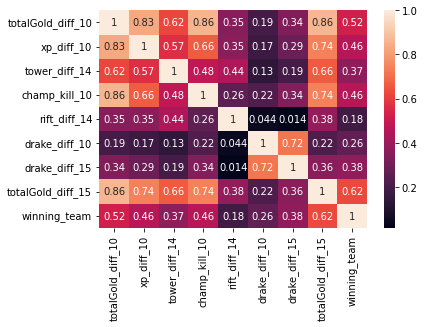

In [11]:
corr = data[["totalGold_diff_10", "xp_diff_10", "tower_diff_14","champ_kill_10", "rift_diff_14", "drake_diff_10", "drake_diff_15", "totalGold_diff_15", "winning_team"]].corr().abs()
sns.heatmap(corr, annot=True)
plt.show()

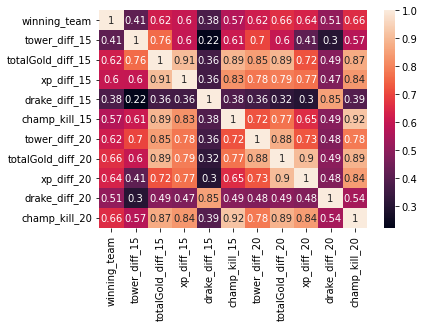

In [64]:
corr = data[["winning_team", "tower_diff_15","totalGold_diff_15", "xp_diff_15", "drake_diff_15", "champ_kill_15","tower_diff_20", "totalGold_diff_20", "xp_diff_20", "drake_diff_20", "champ_kill_20"]].corr().abs()
sns.heatmap(corr, annot=True)
plt.show()

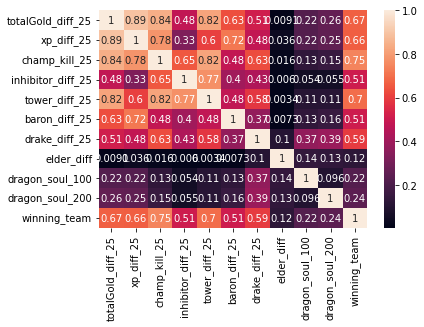

In [61]:
corr = data[["totalGold_diff_25", "xp_diff_25", "champ_kill_25", "inhibitor_diff_25","tower_diff_25", "baron_diff_25", "drake_diff_25", "elder_diff","dragon_soul_100","dragon_soul_200", "winning_team"]].corr().abs()
sns.heatmap(corr, annot=True)
plt.show()

In [23]:
data.columns

Index(['totalGold_diff_10', 'xp_diff_10', 'totalGold_diff_15', 'xp_diff_15',
       'totalGold_diff_20', 'xp_diff_20', 'totalGold_diff_25', 'xp_diff_25',
       'tower_diff_10', 'tower_diff_15', 'tower_diff_20', 'tower_diff_25',
       'tower_diff_14', 'tower_diff', 'inhibitor_diff', 'inhibitor_diff_20',
       'inhibitor_diff_25', 'nexus_tower_diff', 'baron_diff', 'baron_diff_25',
       'rift_diff_14', 'rift_diff_20', 'drake_diff_10', 'drake_diff_15',
       'drake_diff_20', 'drake_diff_25', 'total_drake_diff', 'dragon_soul_100',
       'dragon_soul_200', 'elder_diff', 'champ_kill_10', 'champ_kill_15',
       'champ_kill_20', 'champ_kill_25', 'total_champ_kill', 'winning_team'],
      dtype='object')

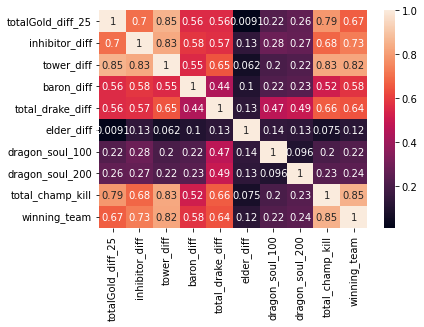

In [58]:
corr = data[["totalGold_diff_25", "inhibitor_diff","tower_diff", "baron_diff", "total_drake_diff", "elder_diff","dragon_soul_100","dragon_soul_200", "total_champ_kill", "winning_team"]].corr().abs()
sns.heatmap(corr, annot=True)
plt.show()

In [53]:
#team 200 wins 185 of 212 matches where they have dragon soul 87,2%
#team 100 wins 126 of 145 matchers where they have dragon soul 86,9%
data_200 = data[data["dragon_soul_200"] == True]

In [54]:
#team 100 wins 21 of 28 matches where they have elder drake
#team 200 wins 26 of 30 matches where they have elder drake

In [56]:
data_200 

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,tower_diff_15,...,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill,winning_team
5,-3110.0,-2086.0,-9748.0,-5195.0,-5685.0,-1341.0,-11905.0,-9714.0,0,1,...,-4,False,True,1,-4,-11,-10,-10,-3,100
8,1431.0,625.0,2291.0,-376.0,-1519.0,-5527.0,-5821.0,-10059.0,0,0,...,-3,False,True,0,-1,1,-1,-6,2,100
33,-3343.0,-2048.0,-6701.0,-3233.0,-9397.0,-5213.0,-10104.0,-5953.0,0,0,...,-4,False,True,0,-7,-9,-11,-10,-8,200
41,-2725.0,-623.0,-5343.0,-4078.0,-9794.0,-7972.0,-13821.0,-11635.0,0,0,...,-4,False,True,0,0,-9,-15,-17,-14,200
44,-3202.0,-1310.0,-3515.0,-191.0,-4669.0,-1769.0,-9592.0,-10653.0,0,2,...,-4,False,True,0,-1,-4,-3,-9,-17,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,-1029.0,-237.0,-3146.0,-2241.0,-4701.0,-1590.0,-7214.0,-5532.0,0,0,...,-4,False,True,0,2,-1,-3,-4,-9,200
1985,2842.0,1693.0,1012.0,-736.0,2069.0,1503.0,3741.0,2976.0,0,0,...,-3,False,True,0,0,2,3,8,11,100
1990,-1101.0,-799.0,-5172.0,-2090.0,-5583.0,-5071.0,-9767.0,-13062.0,0,0,...,-4,False,True,0,0,1,-6,-12,-18,200
1993,-1006.0,-2179.0,-2435.0,-1794.0,-1494.0,-3366.0,-4493.0,-4560.0,0,0,...,-3,False,True,0,0,1,-5,-8,-17,200


In [57]:
data_200[data_200["winning_team"] == 200]

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,tower_diff_15,...,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill,winning_team
33,-3343.0,-2048.0,-6701.0,-3233.0,-9397.0,-5213.0,-10104.0,-5953.0,0,0,...,-4,False,True,0,-7,-9,-11,-10,-8,200
41,-2725.0,-623.0,-5343.0,-4078.0,-9794.0,-7972.0,-13821.0,-11635.0,0,0,...,-4,False,True,0,0,-9,-15,-17,-14,200
44,-3202.0,-1310.0,-3515.0,-191.0,-4669.0,-1769.0,-9592.0,-10653.0,0,2,...,-4,False,True,0,-1,-4,-3,-9,-17,200
58,-733.0,-923.0,-1681.0,-1480.0,-3646.0,-2101.0,-10499.0,-12343.0,0,0,...,-4,False,True,0,-2,-2,-3,-7,-10,200
67,1692.0,1427.0,319.0,-402.0,3770.0,3478.0,3388.0,847.0,1,-1,...,-4,False,True,-1,3,2,5,6,1,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,-506.0,592.0,-1246.0,1867.0,-1294.0,728.0,-3357.0,440.0,0,2,...,-2,False,True,0,0,2,6,2,-2,200
1966,-1029.0,-237.0,-3146.0,-2241.0,-4701.0,-1590.0,-7214.0,-5532.0,0,0,...,-4,False,True,0,2,-1,-3,-4,-9,200
1990,-1101.0,-799.0,-5172.0,-2090.0,-5583.0,-5071.0,-9767.0,-13062.0,0,0,...,-4,False,True,0,0,1,-6,-12,-18,200
1993,-1006.0,-2179.0,-2435.0,-1794.0,-1494.0,-3366.0,-4493.0,-4560.0,0,0,...,-3,False,True,0,0,1,-5,-8,-17,200


In [42]:
#data_200[data_200["dragon_soul_200"] == True]

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,tower_diff_15,...,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill,winning_team
5,-3110.0,-2086.0,-9748.0,-5195.0,-5685.0,-1341.0,-11905.0,-9714.0,0,1,...,-4,False,True,1,-4,-11,-10,-10,-3,100
8,1431.0,625.0,2291.0,-376.0,-1519.0,-5527.0,-5821.0,-10059.0,0,0,...,-3,False,True,0,-1,1,-1,-6,2,100
33,-3343.0,-2048.0,-6701.0,-3233.0,-9397.0,-5213.0,-10104.0,-5953.0,0,0,...,-4,False,True,0,-7,-9,-11,-10,-8,200
41,-2725.0,-623.0,-5343.0,-4078.0,-9794.0,-7972.0,-13821.0,-11635.0,0,0,...,-4,False,True,0,0,-9,-15,-17,-14,200
44,-3202.0,-1310.0,-3515.0,-191.0,-4669.0,-1769.0,-9592.0,-10653.0,0,2,...,-4,False,True,0,-1,-4,-3,-9,-17,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,-1029.0,-237.0,-3146.0,-2241.0,-4701.0,-1590.0,-7214.0,-5532.0,0,0,...,-4,False,True,0,2,-1,-3,-4,-9,200
1985,2842.0,1693.0,1012.0,-736.0,2069.0,1503.0,3741.0,2976.0,0,0,...,-3,False,True,0,0,2,3,8,11,100
1990,-1101.0,-799.0,-5172.0,-2090.0,-5583.0,-5071.0,-9767.0,-13062.0,0,0,...,-4,False,True,0,0,1,-6,-12,-18,200
1993,-1006.0,-2179.0,-2435.0,-1794.0,-1494.0,-3366.0,-4493.0,-4560.0,0,0,...,-3,False,True,0,0,1,-5,-8,-17,200


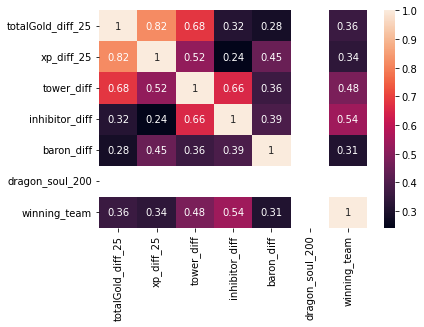

In [33]:
corr = data_200[["totalGold_diff_25", "xp_diff_25", "tower_diff", "inhibitor_diff", "baron_diff","dragon_soul_200", "winning_team"]].corr().abs()
sns.heatmap(corr, annot=True)
plt.show()

In [12]:
elder_data = data[data["elder_diff"] != 0]

In [13]:
elder_data

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,tower_diff_15,...,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill,winning_team
5,-3110.0,-2086.0,-9748.0,-5195.0,-5685.0,-1341.0,-11905.0,-9714.0,0,1,...,-4,False,True,1,-4,-11,-10,-10,-3,100
6,4268.0,1137.0,6187.0,1670.0,4123.0,195.0,3353.0,902.0,0,-2,...,3,True,False,1,6,7,5,6,4,100
67,1692.0,1427.0,319.0,-402.0,3770.0,3478.0,3388.0,847.0,1,-1,...,-4,False,True,-1,3,2,5,6,1,200
115,2871.0,1635.0,3389.0,2877.0,1452.0,-2061.0,3190.0,-1883.0,0,0,...,4,True,False,-1,7,6,4,4,-2,200
250,285.0,123.0,584.0,-726.0,1171.0,-2070.0,5620.0,3599.0,0,-1,...,-4,False,True,-1,-1,-4,-5,-4,-17,200
269,-1540.0,-360.0,-2749.0,-81.0,-2549.0,-462.0,510.0,1270.0,0,2,...,-3,False,True,1,-4,-3,0,2,5,200
273,1455.0,-426.0,-3887.0,-5383.0,-1034.0,-5234.0,-3426.0,-9105.0,0,1,...,-4,False,True,1,3,-2,-2,-3,2,100
320,-1478.0,-596.0,-1510.0,-2136.0,-2017.0,-3363.0,3348.0,4368.0,0,-1,...,-4,False,True,-1,-4,-4,-6,-1,-10,200
374,899.0,-190.0,3376.0,-381.0,2932.0,-1865.0,1250.0,-5455.0,0,-1,...,4,True,False,-1,1,3,2,1,2,100
398,911.0,404.0,2489.0,119.0,2790.0,-376.0,3960.0,316.0,0,-2,...,-3,False,True,-1,4,0,-6,-5,-24,200


In [36]:
data[data["elder_diff"] ==-2]

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,tower_diff_15,...,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill,winning_team
1324,-2621.0,-1595.0,-3201.0,-2965.0,-7238.0,-5537.0,-8825.0,-10064.0,0,0,...,-4,False,True,-2,-3,-1,-4,-7,-8,200


In [46]:
data.columns

Index(['totalGold_diff_10', 'xp_diff_10', 'totalGold_diff_15', 'xp_diff_15',
       'totalGold_diff_20', 'xp_diff_20', 'totalGold_diff_25', 'xp_diff_25',
       'tower_diff_14', 'tower_diff', 'inhibitor_diff', 'nexus_tower_diff',
       'baron_diff', 'rift_diff_14', 'rift_diff_20', 'drake_diff_10',
       'drake_diff_15', 'drake_diff_20', 'total_drake_diff', 'dragon_soul_100',
       'dragon_soul_200', 'elder_diff', 'champ_kill_10', 'champ_kill_15',
       'champ_kill_20', 'total_champ_kill', 'winning_team'],
      dtype='object')

In [37]:
#56,65% af games er længere end 25 min
data[data["totalGold_diff_25"].abs() > 0]

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,tower_diff_15,...,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill,winning_team
0,-2591.0,-2078.0,-882.0,-635.0,-1106.0,-2107.0,2039.0,3015.0,0,1,...,1,False,False,0,-1,-3,1,1,8,100
3,1731.0,-114.0,3815.0,-435.0,1906.0,-2401.0,-5458.0,-12579.0,0,-1,...,0,False,False,0,4,9,7,0,-5,200
5,-3110.0,-2086.0,-9748.0,-5195.0,-5685.0,-1341.0,-11905.0,-9714.0,0,1,...,-4,False,True,1,-4,-11,-10,-10,-3,100
6,4268.0,1137.0,6187.0,1670.0,4123.0,195.0,3353.0,902.0,0,-2,...,3,True,False,1,6,7,5,6,4,100
8,1431.0,625.0,2291.0,-376.0,-1519.0,-5527.0,-5821.0,-10059.0,0,0,...,-3,False,True,0,-1,1,-1,-6,2,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,-1006.0,-2179.0,-2435.0,-1794.0,-1494.0,-3366.0,-4493.0,-4560.0,0,0,...,-3,False,True,0,0,1,-5,-8,-17,200
1994,-4132.0,-1968.0,-3586.0,-3346.0,-4031.0,-705.0,-5596.0,-236.0,0,1,...,-2,False,False,0,-3,-4,-5,-5,-9,200
1995,-2215.0,-73.0,-1895.0,1480.0,-910.0,3290.0,-7512.0,-6932.0,0,1,...,-1,False,False,0,-3,2,2,-2,-10,200
1996,-805.0,1118.0,2117.0,539.0,-699.0,-2434.0,346.0,1573.0,0,-3,...,2,False,False,0,-4,-3,-5,-4,-5,100


In [21]:
#84,8% af games varer længere end 20 min
data[data["totalGold_diff_20"].abs() > 0]

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,tower_diff_15,...,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill,winning_team
0,-2591.0,-2078.0,-882.0,-635.0,-1106.0,-2107.0,2039.0,3015.0,0,1,...,1,False,False,0,-1,-3,1,1,8,100
1,2684.0,919.0,5435.0,1828.0,10132.0,5372.0,NaN,NaN,0,-1,...,2,False,False,0,2,5,10,15,15,100
3,1731.0,-114.0,3815.0,-435.0,1906.0,-2401.0,-5458.0,-12579.0,0,-1,...,0,False,False,0,4,9,7,0,-5,200
4,4354.0,2156.0,8436.0,2967.0,13316.0,7535.0,NaN,NaN,0,-2,...,0,False,False,0,5,10,11,14,14,100
5,-3110.0,-2086.0,-9748.0,-5195.0,-5685.0,-1341.0,-11905.0,-9714.0,0,1,...,-4,False,True,1,-4,-11,-10,-10,-3,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-2215.0,-73.0,-1895.0,1480.0,-910.0,3290.0,-7512.0,-6932.0,0,1,...,-1,False,False,0,-3,2,2,-2,-10,200
1996,-805.0,1118.0,2117.0,539.0,-699.0,-2434.0,346.0,1573.0,0,-3,...,2,False,False,0,-4,-3,-5,-4,-5,100
1997,-3627.0,-1397.0,-7201.0,-4349.0,-9235.0,-3815.0,-12171.0,-11601.0,0,1,...,-3,False,True,0,-8,-15,-15,-19,-25,200
1998,-256.0,-1137.0,3659.0,3297.0,9105.0,8319.0,NaN,NaN,0,1,...,2,False,False,0,1,5,14,23,23,100


In [42]:
data[data["totalGold_diff_15"].abs() > 0]

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_14,tower_diff,...,drake_diff_20,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,total_champ_kill,winning_team
0,2908.0,668.0,7297.0,2484.0,6820.0,412.0,NaN,NaN,0,-5,...,2,1,False,False,0,7,9,18,23,100
1,1751.0,803.0,4131.0,1629.0,NaN,NaN,NaN,NaN,-1,-1,...,0,0,False,False,0,2,4,6,6,100
2,-3726.0,-1561.0,-4999.0,-2449.0,-4368.0,-193.0,-4126.0,3584.0,2,-1,...,-1,-2,False,True,0,-5,-5,-4,2,100
3,-3439.0,-2412.0,-7813.0,-4115.0,NaN,NaN,NaN,NaN,0,4,...,-2,-2,False,False,0,-5,-13,-18,-18,200
4,-829.0,-1324.0,-2852.0,-1107.0,2221.0,2324.0,NaN,NaN,0,-4,...,0,0,False,False,0,-3,-4,-2,14,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-165.0,-86.0,-133.0,236.0,-7532.0,-6931.0,-14575.0,-14879.0,0,8,...,-2,-3,False,False,0,2,0,0,-13,200
996,3815.0,3176.0,8893.0,7898.0,9025.0,7463.0,NaN,NaN,-1,-6,...,1,1,False,False,0,6,11,17,23,100
997,6054.0,3288.0,11894.0,7479.0,NaN,NaN,NaN,NaN,-2,-5,...,1,1,False,False,0,8,14,17,17,100
998,978.0,1474.0,2089.0,1177.0,3392.0,2518.0,323.0,-3648.0,-1,1,...,0,-1,False,True,0,-1,-1,-1,-16,200


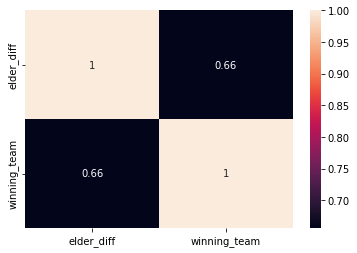

In [34]:
#Elderdrake correlation med andre late game stats
corr = elder_data[["elder_diff", "winning_team"]].corr().abs()
sns.heatmap(corr, annot=True)
plt.show()

In [32]:
#sns.scatterplot(x="totalGold_diff_10", y="xp_diff_10", hue="winning_team", data=data)
#plt.show()

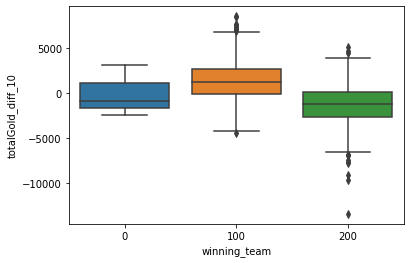

In [10]:
#sns.boxplot(x="winning_team", y="totalGold_diff_10", data=data)
#plt.show()

#sns.boxplot(x="winning_team", y="xp_diff_10", data=data)
#plt.show()

#sns.boxplot(x="winning_team", y="champ_kill_10", data=data)
#plt.show()

In [29]:
#sns.histplot(data=data, x="totalGold_diff_10", hue="winning_team")
#plt.show()

#sns.histplot(data=data, x="xp_diff_10", hue="winning_team")
#plt.show()

#sns.histplot(data=data, x="champ_kill_10", hue="winning_team")
#plt.show()

In [452]:
#plt.plot(data["total_champ_kill"].abs(), label='Total Champion Difference')
#plt.plot(data["xp_diff_25"].abs(), label='XP Difference at 25 minutes')
#plt.plot(data["totalGold_diff_25"].abs(), label='Gold Difference at 25 minutes')

#add labels and legend
#plt.xlabel('Game Number')
#plt.ylabel('Difference')
#plt.title('Game Differences')
#plt.legend()

#show the plot
#plt.show()

In [666]:


y = data["winning_team"]
X = data.drop("winning_team", axis=1)
X = data.drop("nexus_tower_diff", axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = HistGradientBoostingClassifier()

gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Confusion Matrix:
 [[180   0]
 [  0 220]]

Classification Report:
               precision    recall  f1-score   support

         100       1.00      1.00      1.00       180
         200       1.00      1.00      1.00       220

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [668]:
data_15min = data[['totalGold_diff_15', 'xp_diff_15', 'tower_diff_14', 'rift_diff_14', 'drake_diff_15', 'champ_kill_15', "winning_team"]]


In [667]:


y = data_15min["winning_team"]
X = data_15min.drop("winning_team", axis=1)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gb_model = HistGradientBoostingClassifier()

gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Confusion Matrix:
 [[142  38]
 [ 55 165]]

Classification Report:
               precision    recall  f1-score   support

         100       0.72      0.79      0.75       180
         200       0.81      0.75      0.78       220

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



In [670]:
gold_10 = data['totalGold_diff_10'].abs().mean()
gold_15 = data['totalGold_diff_15'].abs().mean()
gold_20 = data['totalGold_diff_20'].abs().mean()
gold_25 = data['totalGold_diff_25'].abs().mean()
print(gold_10, gold_15, gold_20, gold_25)

1920.6106870229007 3995.2022529441883 5139.623693379791 5613.603706972639


In [671]:
xp_10 = data["xp_diff_10"].abs().mean()
xp_15 = data["xp_diff_15"].abs().mean()
xp_20 = data["xp_diff_20"].abs().mean()
xp_25 = data["xp_diff_25"].abs().mean()
print(xp_10, xp_15, xp_20, xp_25)

1190.0106870229008 2521.4997439836147 3842.4506387921024 6259.541041482789


In [672]:
data_gold = {"time": [10, 15, 20, 25],
       "gold": [1920, 3995, 5139, 5613],
        "xp": [1190, 2521, 3842, 6259]}

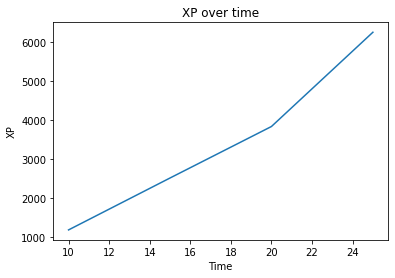

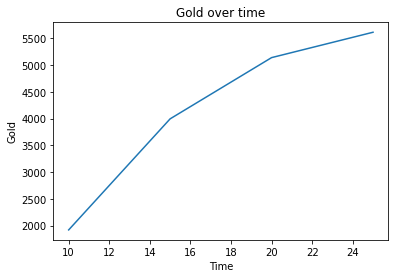

In [674]:


plt.plot(data_gold["time"], data_gold["xp"])
plt.xlabel("Time")
plt.ylabel("XP")
plt.title("XP over time")
plt.show()

plt.plot(data_gold["time"], data_gold["gold"])
plt.xlabel("Time")
plt.ylabel("Gold")
plt.title("Gold over time")
plt.show()



In [5]:
win_data = data[data["winning_team"] == 100]
#win_data = win_data.groupby('winning_team').mean().abs().reset_index()

In [6]:
win_data.columns

Index(['totalGold_diff_10', 'xp_diff_10', 'totalGold_diff_15', 'xp_diff_15',
       'totalGold_diff_20', 'xp_diff_20', 'totalGold_diff_25', 'xp_diff_25',
       'tower_diff_10', 'tower_diff_15', 'tower_diff_20', 'tower_diff_25',
       'tower_diff_14', 'tower_diff', 'inhibitor_diff', 'inhibitor_diff_20',
       'inhibitor_diff_25', 'nexus_tower_diff', 'baron_diff', 'baron_diff_25',
       'rift_diff_14', 'rift_diff_20', 'drake_diff_10', 'drake_diff_15',
       'drake_diff_20', 'drake_diff_25', 'total_drake_diff', 'dragon_soul_100',
       'dragon_soul_200', 'elder_diff', 'champ_kill_10', 'champ_kill_15',
       'champ_kill_20', 'champ_kill_25', 'total_champ_kill', 'winning_team'],
      dtype='object')

In [7]:
objective_data = win_data.drop(['totalGold_diff_10', 'xp_diff_10', 'totalGold_diff_15',
       'xp_diff_15', 'totalGold_diff_20', 'xp_diff_20', 'totalGold_diff_25',
       'xp_diff_25', 'dragon_soul_100', 'dragon_soul_200', 'champ_kill_10',
       'champ_kill_15', 'champ_kill_20', 'total_champ_kill', 'champ_kill_25'], axis = 1)

Text(0.5, 1.0, 'Radar chart of mean champ kill difference by time')

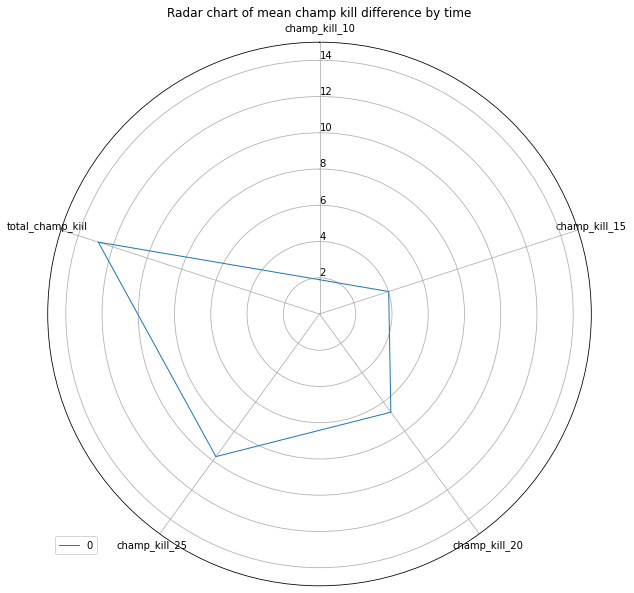

In [8]:
#get number of columns in data
win_data = win_data.groupby('winning_team').mean().abs().reset_index()
cols_to_exclude = ['winning_team', 'totalGold_diff_10', 'xp_diff_10', 'totalGold_diff_15', 'xp_diff_15',
       'totalGold_diff_20', 'xp_diff_20', 'totalGold_diff_25', 'xp_diff_25',
       'tower_diff_14', 'tower_diff', 'inhibitor_diff', 'nexus_tower_diff',
       'baron_diff', 'rift_diff_14', 'rift_diff_20', 'drake_diff_10',
       'drake_diff_15', 'drake_diff_20', 'total_drake_diff', 'dragon_soul_100',
       'dragon_soul_200', 'elder_diff', 'win_data', 'tower_diff_10', 'tower_diff_15',
       'tower_diff_20', 'tower_diff_25', 'inhibitor_diff_20', 'inhibitor_diff_25', 'drake_diff_25', 'baron_diff_25'] # Add any column names you want to exclude here
cols_to_use = [col for col in win_data.columns if col not in cols_to_exclude]
n_cols = len(cols_to_use)

#angles of chart
angles = [n / float(n_cols) * 2 * np.pi for n in range(n_cols)]
angles += angles[:1]


fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)


ax.set_xticks(angles[:-1])
ax.set_xticklabels(cols_to_use)

#range of axis
ax.set_rlabel_position(0)
ax.set_rlim(0, 15)

#plot data
values = win_data[cols_to_use].values.tolist()
values += values[:1]
for i in range(len(win_data)):
    values[i].append(values[i][0])
    ax.plot(angles, values[i], linewidth=1, linestyle='solid', label=i)
ax.fill(values[0], alpha=0) #if you want to specify a baseline, change the values, and make alpha fx 0.1

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Radar chart of mean champ kill difference by time')


Text(0.5, 1.0, 'Radar chart of mean champ kill difference by time')

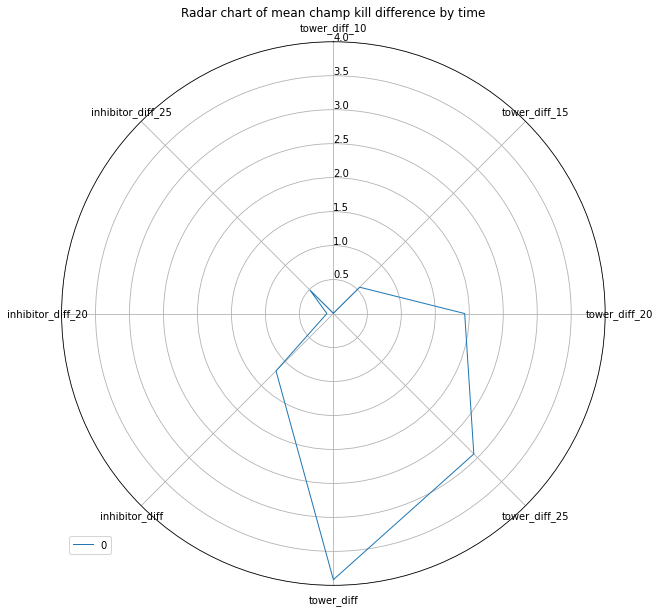

In [29]:
#get number of columns in data
win_data = win_data.groupby('winning_team').mean().abs().reset_index()
cols_to_exclude = ["champ_kill_10","champ_kill_15","champ_kill_20","champ_kill_25","total_champ_kill",'winning_team', 'totalGold_diff_10', 'xp_diff_10', 'totalGold_diff_15', 'xp_diff_15',
       'totalGold_diff_20', 'xp_diff_20', 'totalGold_diff_25', 'xp_diff_25',
       'tower_diff_14', 'nexus_tower_diff',
       'baron_diff', 'rift_diff_14', 'rift_diff_20', 'drake_diff_10',
       'drake_diff_15', 'drake_diff_20', 'total_drake_diff', 'dragon_soul_100',
       'dragon_soul_200', 'elder_diff', 'win_data', 'drake_diff_25', 'baron_diff_25'] # Add any column names you want to exclude here
cols_to_use = [col for col in win_data.columns if col not in cols_to_exclude]
n_cols = len(cols_to_use)

#angles of chart
angles = [n / float(n_cols) * 2 * np.pi for n in range(n_cols)]
angles += angles[:1]


fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)


ax.set_xticks(angles[:-1])
ax.set_xticklabels(cols_to_use)

#range of axis
ax.set_rlabel_position(0)
ax.set_rlim(0, 4)

#plot data
values = win_data[cols_to_use].values.tolist()
values += values[:1]
for i in range(len(win_data)):
    values[i].append(values[i][0])
    ax.plot(angles, values[i], linewidth=1, linestyle='solid', label=i)
ax.fill(values[0], alpha=0) #if you want to specify a baseline, change the values, and make alpha fx 0.1

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Radar chart of mean champ kill difference by time')


Text(0.5, 1.0, 'Radar chart of mean objective difference by category')

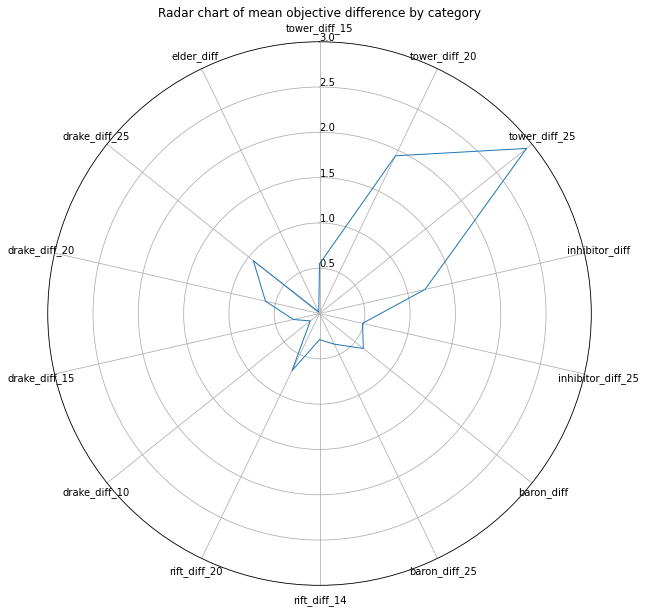

In [36]:
#abs() then mean() to get correct values
#lambda basically a tidy for loop for x in cols_to_use apply .abs().mean()
win_data = objective_data.groupby('winning_team').mean().abs().reset_index()
#win_data = objective_data.groupby('winning_team').apply(lambda x: x[cols_to_use].abs().mean()).reset_index()
cols_to_exclude = ['winning_team', 'inhibitor_diff_20',"nexus_tower_diff", "tower_diff", "tower_diff_14", "tower_diff_10","total_drake_diff"] #Add column names to exclude here
cols_to_use = [col for col in win_data.columns if col not in cols_to_exclude]
n_cols = len(cols_to_use)

#angles of chart
angles = [n / float(n_cols) * 2 * np.pi for n in range(n_cols)]
angles += angles[:1]


fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)


ax.set_xticks(angles[:-1])
ax.set_xticklabels(cols_to_use)

#range of axis
ax.set_rlabel_position(0)
ax.set_rlim(0, 3)

#plot data
values = win_data[cols_to_use].values.tolist()
values += values[:1]
for i in range(len(win_data)):
    values[i].append(values[i][0])
    ax.plot(angles, values[i], linewidth=1, linestyle='solid', label=i)
ax.fill(values[0], alpha=0) #if you want to specify a baseline, change the values, and make alpha fx 0.1

#plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Radar chart of mean objective difference by category')


In [ ]:
################################################################################################################################
###########################################################DATA Preperation#####################################################
################################################################################################################################

In [589]:
data = pd.read_csv("Masters_dataset_final_1.csv")

In [201]:
data = pd.read_csv("masters_dataset_final.csv")

In [2]:
data = pd.read_csv("Masters_dataset_final_combined.csv")

In [3]:
data = data.drop(["Unnamed: 0"], axis = 1)

<AxesSubplot:>

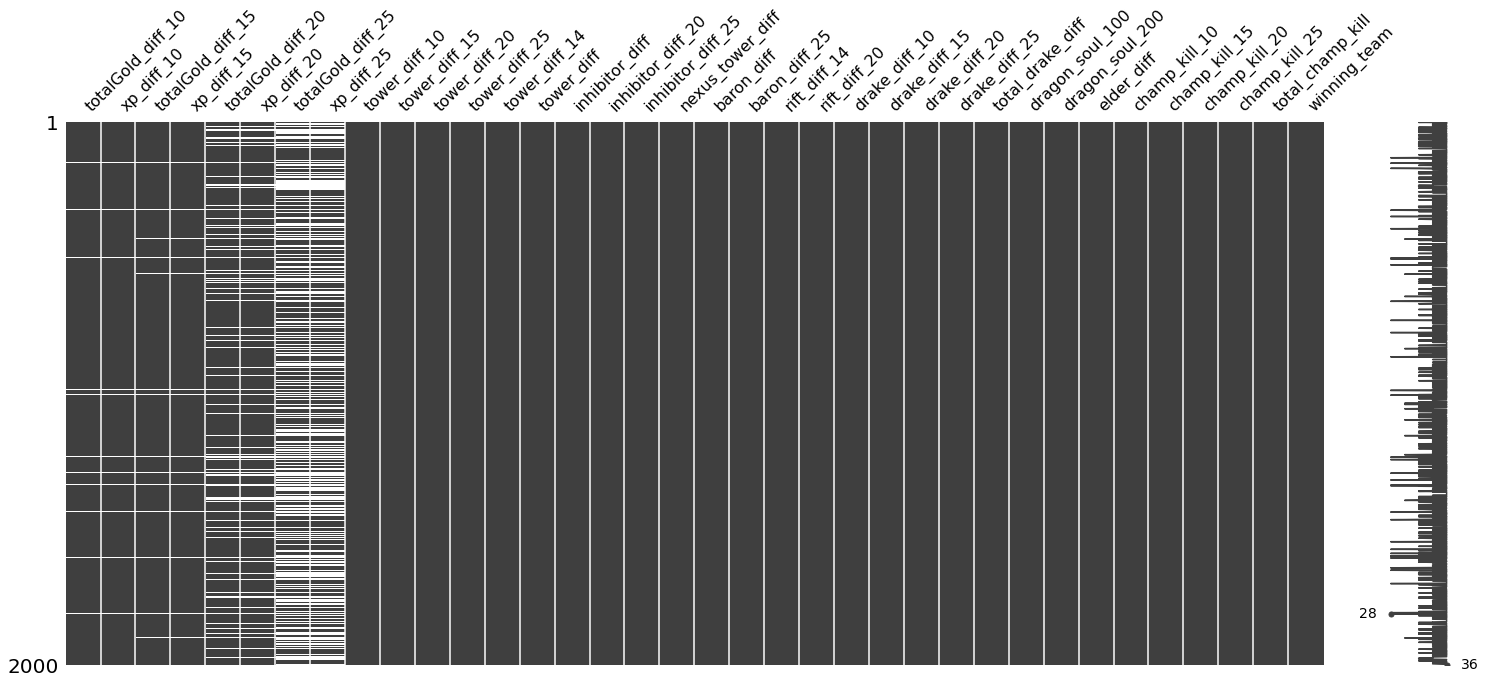

In [6]:
msno.matrix(data)


In [4]:
data = data.drop_duplicates()

In [5]:
data.columns

Index(['totalGold_diff_10', 'xp_diff_10', 'totalGold_diff_15', 'xp_diff_15',
       'totalGold_diff_20', 'xp_diff_20', 'totalGold_diff_25', 'xp_diff_25',
       'tower_diff_10', 'tower_diff_15', 'tower_diff_20', 'tower_diff_25',
       'tower_diff_14', 'tower_diff', 'inhibitor_diff', 'inhibitor_diff_20',
       'inhibitor_diff_25', 'nexus_tower_diff', 'baron_diff', 'baron_diff_25',
       'rift_diff_14', 'rift_diff_20', 'drake_diff_10', 'drake_diff_15',
       'drake_diff_20', 'drake_diff_25', 'total_drake_diff', 'dragon_soul_100',
       'dragon_soul_200', 'elder_diff', 'champ_kill_10', 'champ_kill_15',
       'champ_kill_20', 'champ_kill_25', 'total_champ_kill', 'winning_team'],
      dtype='object')

In [5]:
data.dropna(subset=['totalGold_diff_10'], inplace=True)


In [6]:
data.dropna(subset=['totalGold_diff_15'], inplace=True)


In [47]:
data["xp_diff_20"].abs().mean()

3853.8439716312055

In [48]:
data["xp_diff_25"].abs().mean()

6275.117805755395

In [62]:
6275/3853

1.6286010900596937

In [49]:
data["totalGold_diff_20"].abs().mean()

5160.84988179669

In [50]:
data["totalGold_diff_25"].abs().mean()

5630.080935251798

In [63]:
5630/5160

1.0910852713178294

In [7]:
data.loc[data["totalGold_diff_20"].isna(), "totalGold_diff_20"] = data["totalGold_diff_15"] * (data["totalGold_diff_20"].abs().mean())/(data["totalGold_diff_15"].abs().mean())


In [8]:
data.loc[data["totalGold_diff_25"].isna(), "totalGold_diff_25"] = data["totalGold_diff_20"] * (data["totalGold_diff_25"].abs().mean())/(data["totalGold_diff_20"].abs().mean())


In [9]:
data.loc[data["xp_diff_20"].isna(), "xp_diff_20"] = data["xp_diff_15"] * (data["xp_diff_20"].abs().mean())/(data["xp_diff_15"].abs().mean())


In [10]:
data.loc[data["xp_diff_25"].isna(), "xp_diff_25"] = data["xp_diff_20"] * (data["xp_diff_25"].abs().mean())/(data["xp_diff_20"].abs().mean())


In [56]:
data["xp_diff_20"].abs().mean()

4345.552442071672

In [57]:
data["xp_diff_25"].abs().mean()

7436.162055700783

In [58]:
data["totalGold_diff_20"].abs().mean()

5827.973420044197

In [59]:
data["totalGold_diff_25"].abs().mean()

6787.975105704362

In [61]:
data["xp_diff_25"].abs().mean()/data["xp_diff_20"].abs().mean()

1.7112121312142565

In [64]:
data["totalGold_diff_25"].abs().mean()/data["totalGold_diff_20"].abs().mean()

1.1647230720645403

In [11]:
data["dragon_soul_100"] = data["dragon_soul_100"].astype(int)
data["dragon_soul_200"] = data["dragon_soul_200"].astype(int)
data.dropna(subset=['dragon_soul_100'], inplace=True)
data.dropna(subset=['dragon_soul_200'], inplace=True)

<AxesSubplot:>

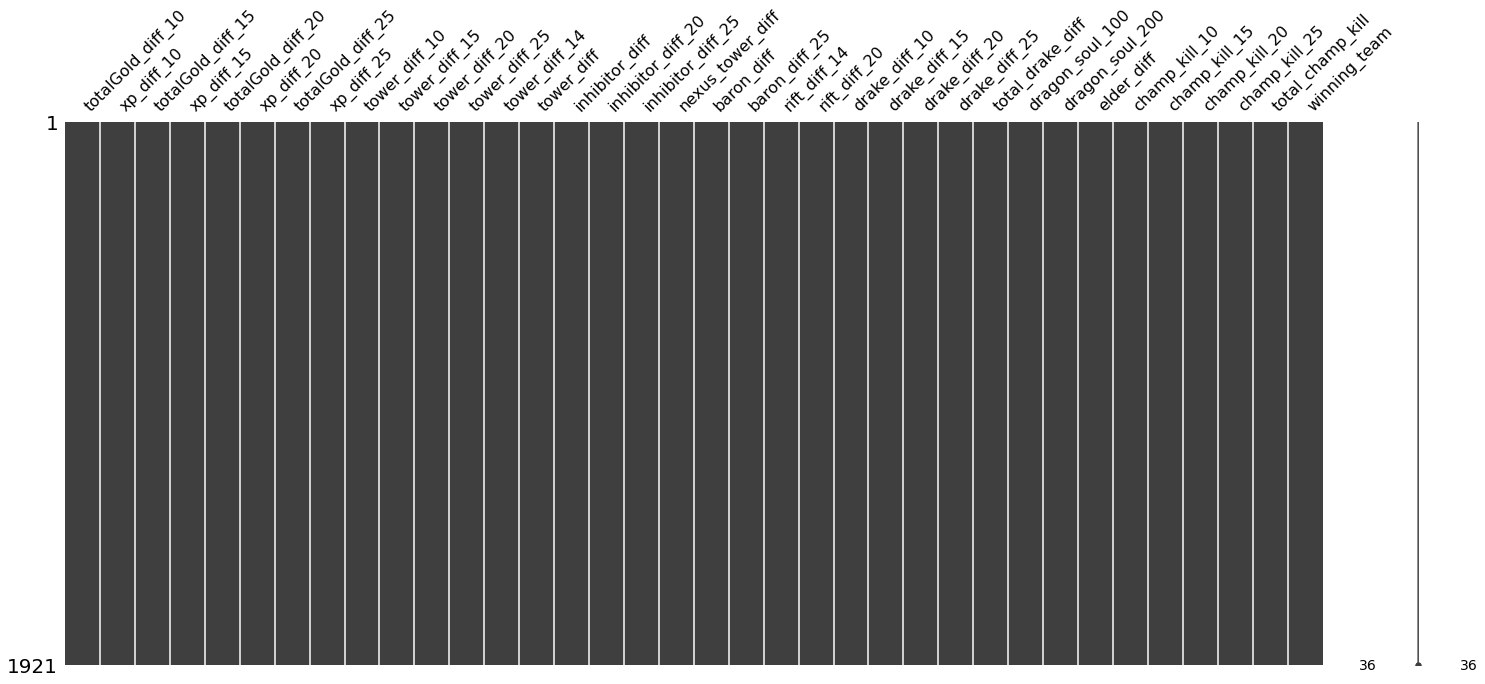

In [12]:
msno.matrix(data)

In [13]:
data = data.reset_index(drop=True)

In [14]:
#binary classification with sigmoid activation function is perfect as sigmoid can be interpreted as %
#to use sigmoid the target variables needs to be 0 and 1
data["winning_team"] = data["winning_team"].replace({100: 1, 200: 0})

In [494]:
print((data["xp_diff_25"].abs().mean())/(data["xp_diff_20"].abs().mean()))

1.7490388995280761


In [495]:
print((data["totalGold_diff_25"].abs().mean())/(data["totalGold_diff_20"].abs().mean()))

1.1985556987729948


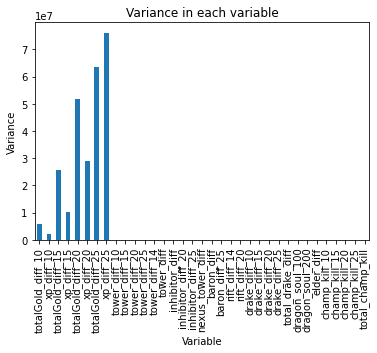

In [127]:
variance = data.iloc[:, :-1].var()

variance.plot(kind='bar', title='Variance in each variable')

plt.xlabel('Variable')
plt.ylabel('Variance')

plt.show()

In [15]:

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(data.iloc[:, :-1])

normalized_data = pd.DataFrame(normalized_data, columns = data.columns[:-1])

normalized_data = pd.concat([pd.DataFrame(normalized_data, columns=data.columns[:-1]), data.iloc[:, -1]], axis=1)



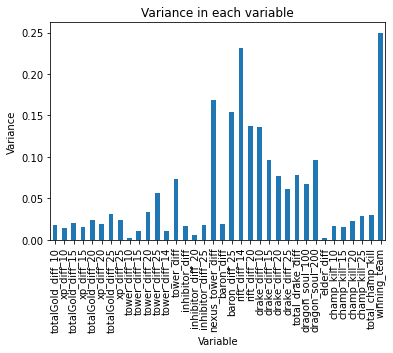

In [203]:
variance = normalized_data.var()

# Plot the variance as a bar chart
variance.plot(kind='bar', title='Variance in each variable')
plt.xlabel('Variable')
plt.ylabel('Variance')

plt.show()

In [204]:
normalized_data

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,tower_diff_15,...,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill,winning_team
0,0.385708,0.339429,0.498622,0.423088,0.499292,0.393712,0.568736,0.502074,0.5,0.500000,...,0.625,0.0,0.0,0.5,0.517241,0.471698,0.569231,0.608108,0.611765,1
1,0.676118,0.581924,0.674432,0.520259,0.741906,0.586909,0.741906,0.586909,0.5,0.333333,...,0.750,0.0,0.0,0.5,0.620690,0.622642,0.707692,0.797297,0.694118,1
2,0.454470,0.452302,0.425315,0.374127,0.425315,0.374127,0.425315,0.374127,0.5,0.416667,...,0.250,0.0,0.0,0.5,0.551724,0.547170,0.446154,0.500000,0.435294,0
3,0.623651,0.498341,0.629345,0.430978,0.564317,0.386117,0.401197,0.223117,0.5,0.333333,...,0.500,0.0,0.0,0.5,0.689655,0.698113,0.661538,0.594595,0.458824,0
4,0.768058,0.682013,0.757953,0.565195,0.810644,0.642783,0.810644,0.642783,0.5,0.250000,...,0.500,0.0,0.0,0.5,0.724138,0.716981,0.723077,0.783784,0.682353,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,0.406408,0.501659,0.470429,0.506529,0.503524,0.533127,0.355295,0.324135,0.5,0.500000,...,0.375,0.0,0.0,0.5,0.448276,0.566038,0.584615,0.567568,0.400000,0
1917,0.484034,0.598026,0.582088,0.469405,0.508079,0.385265,0.530902,0.476279,0.5,0.166667,...,0.750,0.0,0.0,0.5,0.413793,0.471698,0.476923,0.540541,0.458824,1
1918,0.328672,0.394530,0.322758,0.276561,0.323798,0.349591,0.251178,0.240612,0.5,0.500000,...,0.125,0.0,1.0,0.5,0.275862,0.245283,0.323077,0.337838,0.223529,0
1919,0.514259,0.415568,0.625003,0.578214,0.719734,0.663036,0.719734,0.663036,0.5,0.500000,...,0.750,0.0,0.0,0.5,0.586207,0.622642,0.769231,0.905405,0.788235,1


In [89]:
#dont think this is smart, hvis gør det for guld er det kills der er problemet, og efter er det towers osv
#cols_to_normalize = ['totalGold_diff_10', 'xp_diff_10', 'totalGold_diff_15', 'xp_diff_15',
#      'totalGold_diff_20', 'xp_diff_20', 'totalGold_diff_25', 'xp_diff_25', 'champ_kill_10', 'champ_kill_15',
#       'champ_kill_20', 'champ_kill_25', 'total_champ_kill']

#data_original = data[['tower_diff_10', 'tower_diff_15', 'tower_diff_20', 'tower_diff_25',
#       'tower_diff_14', 'tower_diff', 'inhibitor_diff', 'inhibitor_diff_20',
#       'inhibitor_diff_25', 'baron_diff', 'baron_diff_25', 'rift_diff_14',
#       'rift_diff_20', 'drake_diff_10', 'drake_diff_15', 'drake_diff_20',
#       'drake_diff_25', 'total_drake_diff', 'dragon_soul_100',
#       'dragon_soul_200', 'elder_diff', 'winning_team']]

# create scaler object
#scaler = MinMaxScaler()

# normalize selected columns
#normalized_data = scaler.fit_transform(data[cols_to_normalize])

# create new DataFrame with normalized data and unmodified columns
#data_normalized = pd.DataFrame(normalized_data, columns=cols_to_normalize)
#data_normalized = data_normalized.reset_index(drop=True)
#data_original = data_original.reset_index(drop=True)

#data_normalized = pd.concat([data_normalized, data_original], axis=1)


In [277]:
reversed_data_description = data.describe().T.iloc[::-1]

round(reversed_data_description, 2)

,count,mean,std,min,25%,50%,75%,max
winning_team,1921.0,0.48,0.50,0.00,0.00,0.0,1.0,1.00
total_champ_kill,1921.0,-0.01,14.63,-44.00,-13.00,-1.0,13.0,41.00
champ_kill_25,1921.0,0.10,12.54,-44.00,-10.00,0.0,10.0,30.00
champ_kill_20,1921.0,0.12,9.73,-36.00,-7.00,0.0,7.0,29.00
champ_kill_15,1921.0,0.15,6.59,-28.00,-4.00,0.0,4.0,25.00
champ_kill_10,1921.0,0.10,3.73,-16.00,-2.00,0.0,2.0,13.00
elder_diff,1921.0,-0.00,0.18,-2.00,0.00,0.0,0.0,2.00
dragon_soul_200,1921.0,0.11,0.31,0.00,0.00,0.0,0.0,1.00
dragon_soul_100,1921.0,0.07,0.26,0.00,0.00,0.0,0.0,1.00
total_drake_diff,1921.0,-0.29,2.23,-4.00,-2.00,0.0,2.0,4.00


In [794]:
################################################################################################################################
##########################################################modeling the data#####################################################
################################################################################################################################

In [179]:
X = data

In [173]:
#X.reset_index(drop=True)

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,tower_diff_15,...,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill,winning_team
0,-2591.0,-2078.0,-882.0,-635.0,-1106.000000,-2107.000000,2039.000000,3015.000000,0,1,...,1,0,0,0,-1,-3,1,1,8,1
1,2684.0,919.0,5435.0,1828.0,10132.000000,5372.000000,9787.961599,7757.341167,0,-1,...,2,0,0,0,2,5,10,15,15,1
2,-1342.0,-683.0,-3516.0,-1876.0,-4532.670775,-2865.163501,-4378.761102,-4137.388455,0,0,...,-2,0,0,0,0,1,-7,-7,-7,0
3,1731.0,-114.0,3815.0,-435.0,1906.000000,-2401.000000,-5458.000000,-12579.000000,0,-1,...,0,0,0,0,4,9,7,0,-5,0
4,4354.0,2156.0,8436.0,2967.0,13316.000000,7535.000000,12863.846886,10880.782892,0,-2,...,0,0,0,0,5,10,11,14,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,-2215.0,-73.0,-1895.0,1480.0,-910.000000,3290.000000,-7512.000000,-6932.000000,0,1,...,-1,0,0,0,-3,2,2,-2,-10,0
1917,-805.0,1118.0,2117.0,539.0,-699.000000,-2434.000000,346.000000,1573.000000,0,-3,...,2,0,0,0,-4,-3,-5,-4,-5,1
1918,-3627.0,-1397.0,-7201.0,-4349.0,-9235.000000,-3815.000000,-12171.000000,-11601.000000,0,1,...,-3,0,1,0,-8,-15,-15,-19,-25,0
1919,-256.0,-1137.0,3659.0,3297.0,9105.000000,8319.000000,8795.834027,12012.904164,0,1,...,2,0,0,0,1,5,14,23,23,1


In [180]:
#normalized_data is the cleaned and prepared version of our dataset

#fully normalized
normalized_data

#gold & xp normalized without target
data_normalized

#Data without target and NOT normalized
X


,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,tower_diff_15,...,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill,winning_team
0,-2591.0,-2078.0,-882.0,-635.0,-1106.000000,-2107.000000,2039.000000,3015.000000,0,1,...,1,0,0,0,-1,-3,1,1,8,1
1,2684.0,919.0,5435.0,1828.0,10132.000000,5372.000000,9787.961599,7757.341167,0,-1,...,2,0,0,0,2,5,10,15,15,1
2,-1342.0,-683.0,-3516.0,-1876.0,-4532.670775,-2865.163501,-4378.761102,-4137.388455,0,0,...,-2,0,0,0,0,1,-7,-7,-7,0
3,1731.0,-114.0,3815.0,-435.0,1906.000000,-2401.000000,-5458.000000,-12579.000000,0,-1,...,0,0,0,0,4,9,7,0,-5,0
4,4354.0,2156.0,8436.0,2967.0,13316.000000,7535.000000,12863.846886,10880.782892,0,-2,...,0,0,0,0,5,10,11,14,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-2215.0,-73.0,-1895.0,1480.0,-910.000000,3290.000000,-7512.000000,-6932.000000,0,1,...,-1,0,0,0,-3,2,2,-2,-10,0
1996,-805.0,1118.0,2117.0,539.0,-699.000000,-2434.000000,346.000000,1573.000000,0,-3,...,2,0,0,0,-4,-3,-5,-4,-5,1
1997,-3627.0,-1397.0,-7201.0,-4349.0,-9235.000000,-3815.000000,-12171.000000,-11601.000000,0,1,...,-3,0,1,0,-8,-15,-15,-19,-25,0
1998,-256.0,-1137.0,3659.0,3297.0,9105.000000,8319.000000,8795.834027,12012.904164,0,1,...,2,0,0,0,1,5,14,23,23,1


In [209]:
normalized_data.iloc[:,: -1]

,totalGold_diff_10,xp_diff_10,totalGold_diff_15,xp_diff_15,totalGold_diff_20,xp_diff_20,totalGold_diff_25,xp_diff_25,tower_diff_10,tower_diff_15,...,drake_diff_25,total_drake_diff,dragon_soul_100,dragon_soul_200,elder_diff,champ_kill_10,champ_kill_15,champ_kill_20,champ_kill_25,total_champ_kill
0,0.385708,0.339429,0.498622,0.423088,0.499292,0.393712,0.568736,0.502074,0.5,0.500000,...,0.625,0.625,0.0,0.0,0.5,0.517241,0.471698,0.569231,0.608108,0.611765
1,0.676118,0.581924,0.674432,0.520259,0.741906,0.586909,0.741906,0.586909,0.5,0.333333,...,0.750,0.750,0.0,0.0,0.5,0.620690,0.622642,0.707692,0.797297,0.694118
2,0.454470,0.452302,0.425315,0.374127,0.425315,0.374127,0.425315,0.374127,0.5,0.416667,...,0.250,0.250,0.0,0.0,0.5,0.551724,0.547170,0.446154,0.500000,0.435294
3,0.623651,0.498341,0.629345,0.430978,0.564317,0.386117,0.401197,0.223117,0.5,0.333333,...,0.500,0.500,0.0,0.0,0.5,0.689655,0.698113,0.661538,0.594595,0.458824
4,0.768058,0.682013,0.757953,0.565195,0.810644,0.642783,0.810644,0.642783,0.5,0.250000,...,0.500,0.500,0.0,0.0,0.5,0.724138,0.716981,0.723077,0.783784,0.682353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,0.406408,0.501659,0.470429,0.506529,0.503524,0.533127,0.355295,0.324135,0.5,0.500000,...,0.500,0.375,0.0,0.0,0.5,0.448276,0.566038,0.584615,0.567568,0.400000
1917,0.484034,0.598026,0.582088,0.469405,0.508079,0.385265,0.530902,0.476279,0.5,0.166667,...,0.625,0.750,0.0,0.0,0.5,0.413793,0.471698,0.476923,0.540541,0.458824
1918,0.328672,0.394530,0.322758,0.276561,0.323798,0.349591,0.251178,0.240612,0.5,0.500000,...,0.375,0.125,0.0,1.0,0.5,0.275862,0.245283,0.323077,0.337838,0.223529
1919,0.514259,0.415568,0.625003,0.578214,0.719734,0.663036,0.719734,0.663036,0.5,0.500000,...,0.750,0.750,0.0,0.0,0.5,0.586207,0.622642,0.769231,0.905405,0.788235


In [175]:
X = X.drop(["winning_team"],axis = 1)

In [800]:
#data_normalized = data_normalized.drop(["winning_team"], axis = 1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data.iloc[:,:-1], normalized_data.iloc[:, -1], test_size = 0.2, random_state = 3)

In [17]:
#100 weak learners
gb = GradientBoostingClassifier(n_estimators = 100, random_state = 3)

gb.fit(X_train, y_train)


y_pred = gb.predict(X_test)


#performance = classification_report(y_test, y_pred)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Confusion Matrix:
 [[188   0]
 [  2 195]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       188
           1       1.00      0.99      0.99       197

    accuracy                           0.99       385
   macro avg       0.99      0.99      0.99       385
weighted avg       0.99      0.99      0.99       385



In [803]:
data_normalized.columns

Index(['totalGold_diff_10', 'xp_diff_10', 'totalGold_diff_15', 'xp_diff_15',
       'totalGold_diff_20', 'xp_diff_20', 'totalGold_diff_25', 'xp_diff_25',
       'tower_diff_10', 'tower_diff_15', 'tower_diff_20', 'tower_diff_25',
       'tower_diff_14', 'tower_diff', 'inhibitor_diff', 'inhibitor_diff_20',
       'inhibitor_diff_25', 'baron_diff', 'baron_diff_25', 'rift_diff_14',
       'rift_diff_20', 'drake_diff_10', 'drake_diff_15', 'drake_diff_20',
       'drake_diff_25', 'total_drake_diff', 'dragon_soul_100',
       'dragon_soul_200', 'elder_diff', 'champ_kill_10', 'champ_kill_15',
       'champ_kill_20', 'champ_kill_25', 'total_champ_kill'],
      dtype='object')

In [212]:
#data_normalized = data_normalized.astype('float32')
#target_binary = target_binary.astype('float32')

X_train, X_test, y_train, y_test = train_test_split(normalized_data.iloc[:,:-1], normalized_data.iloc[:,-1], test_size = 0.2, random_state = 3)

#creating the model
nn = Sequential()
#neurons in input layer equal to num features
nn.add(Dense(26, activation= "relu", input_dim=X_train.shape[1]))
nn.add(Dense(13, activation= "relu"))
nn.add(Dense(1, activation= "sigmoid"))


nn.compile(optimizer = "adam", loss = "binary_crossentropy", metrics=['accuracy'])


history = nn.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)


y_pred = nn.predict(X_test)

y_pred_binary = (y_pred > 0.5).astype(int)



loss, accuracy = nn.evaluate(X_test, y_test, verbose=0)
print("Neural Network Accuracy:", accuracy)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_binary))
print('\nClassification Report:\n', classification_report(y_test, y_pred_binary))


Neural Network Accuracy: 0.9974026083946228
Confusion Matrix:
 [[188   0]
 [  1 196]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       188
           1       1.00      0.99      1.00       197

    accuracy                           1.00       385
   macro avg       1.00      1.00      1.00       385
weighted avg       1.00      1.00      1.00       385



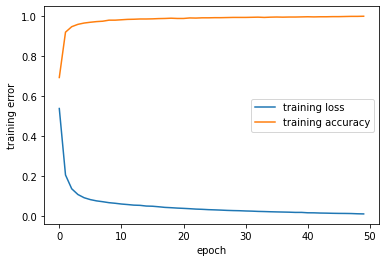

In [805]:
plt.figure("Model training")
plt.ylabel("training error")
plt.xlabel("epoch")
plt.plot(history.history["loss"], label= "training loss")
plt.plot(history.history["accuracy"], label= "training accuracy")
plt.legend(loc="best")

In [146]:
from scikeras.wrappers import KerasClassifier

nn_classifier = KerasClassifier(model = nn, optimizer="adam", epochs=50, verbose=0)


In [213]:

X_train, X_test, y_train, y_test = train_test_split(normalized_data.iloc[:,:-1], normalized_data.iloc[:,-1], test_size = 0.2, random_state = 3)

#100 trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 7)


rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Confusion Matrix:
 [[188   0]
 [  0 197]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00       197

    accuracy                           1.00       385
   macro avg       1.00      1.00      1.00       385
weighted avg       1.00      1.00      1.00       385



In [148]:
for model in [nn_classifier, gb, rf]:
   model._estimator_type = "classifier"

In [149]:

ensemble = VotingClassifier(estimators=[("Sequential", nn_classifier), ("GradientBoostingClassifier", gb), ("RandomForestClassifier", rf)], voting="soft")

In [214]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data.iloc[:,:-1],normalized_data.iloc[:,-1], test_size = 0.2, random_state = 3)

In [215]:
ensemble.fit(X_train, y_train)

INFO:tensorflow:Assets written to: C:\Users\rasmu\AppData\Local\Temp\tmpdagdpxc8\assets


VotingClassifier(estimators=[('Sequential',
                              KerasClassifier(epochs=50, model=<keras.engine.sequential.Sequential object at 0x000002373006EEE0>, optimizer='adam', verbose=0)),
                             ('GradientBoostingClassifier',
                              GradientBoostingClassifier(random_state=3)),
                             ('RandomForestClassifier',
                              RandomForestClassifier(random_state=7))],
                 voting='soft')

In [216]:
print(classification_report(y_test, ensemble.predict(X_test)), confusion_matrix(y_test, ensemble.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       188
           1       1.00      0.99      1.00       197

    accuracy                           1.00       385
   macro avg       1.00      1.00      1.00       385
weighted avg       1.00      1.00      1.00       385
 [[188   0]
 [  1 196]]


In [16]:
data_25 = normalized_data[['totalGold_diff_25', 'xp_diff_25',
       'tower_diff_25','rift_diff_14', 'rift_diff_20', 'dragon_soul_100',
       'dragon_soul_200', 'champ_kill_25','inhibitor_diff_25', 'baron_diff_25', 'drake_diff_25', 'winning_team']]

In [17]:
data_20 = normalized_data[['totalGold_diff_20', 'xp_diff_20', 'tower_diff_20','rift_diff_14', 'rift_diff_20',
                'drake_diff_20', 'champ_kill_20', 'inhibitor_diff_20', 'winning_team']]

In [18]:
data_15 = normalized_data[['totalGold_diff_15', 'xp_diff_15',
       'tower_diff_14','rift_diff_14','drake_diff_15', 'champ_kill_15', 'tower_diff_15', 'winning_team']]

In [55]:
data_10 = normalized_data[['totalGold_diff_10', 'xp_diff_10',
        'drake_diff_10', 'champ_kill_10', 'tower_diff_10', 'winning_team']]

In [20]:
X_train_25, X_test_25, y_train_25, y_test_25 = train_test_split(data_25.iloc[:,:-1], data_25.iloc[:,-1], test_size = 0.2, random_state = 3)

In [21]:
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_20.iloc[:,:-1], data_20.iloc[:,-1], test_size = 0.3, random_state = 44)

In [22]:
X_train_15, X_test_15, y_train_15, y_test_15 = train_test_split(data_15.iloc[:,:-1], data_15.iloc[:,-1], test_size = 0.2, random_state = 3)

In [56]:
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(data_10.iloc[:,:-1], data_10.iloc[:,-1], test_size = 0.2, random_state = 3)

In [80]:
from lazypredict.Supervised import LazyClassifier

lazy_10 = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
lazy_15 = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
lazy_20 = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
lazy_25 = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)


model_10, predictions_10 = lazy_10.fit(X_train_10, X_test_10, y_train_10, y_test_10)
model_15, predictions_15 = lazy_15.fit(X_train_15, X_test_15, y_train_15, y_test_15)
model_20, predictions_20 = lazy_20.fit(X_train_20, X_test_20, y_train_20, y_test_20)
model_25, predictions_25 = lazy_25.fit(X_train_25, X_test_25, y_train_25, y_test_25)

print("10 min", model_10, predictions_10)
print("15 min", model_15, predictions_15)
print("20 min", model_20, predictions_20)
print("25 min", model_25, predictions_25)



100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.05it/s]

10 min                                Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SGDClassifier                      0.74               0.74     0.74      0.74   
QuadraticDiscriminantAnalysis      0.74               0.74     0.74      0.74   
NuSVC                              0.74               0.74     0.74      0.74   
LinearSVC                          0.74               0.74     0.74      0.73   
CalibratedClassifierCV             0.74               0.74     0.74      0.73   
LogisticRegression                 0.74               0.74     0.74      0.73   
SVC                                0.74               0.74     0.74      0.73   
BaggingClassifier                  0.74               0.74     0.74      0.74   
AdaBoostClassifier                 0.74               0.74     0.74      0.74   
RandomForestClassifier             0.73               0.73     0.73      0.73   
LabelSpreading       

#10 min
1SGDClassifier                      0.74               0.74     0.74      0.74   
2QuadraticDiscriminantAnalysis      0.74               0.74     0.74      0.74   
2NuSVC                              0.74               0.74     0.74      0.74 
1BaggingClassifier                  0.74               0.74     0.74      0.74

#15 min
3CalibratedClassifierCV             0.81               0.81     0.81      0.81   
LogisticRegression                 0.81               0.81     0.81      0.81   
3LinearSVC                          0.81               0.81     0.81      0.81   
3LinearDiscriminantAnalysis         0.81               0.81     0.81      0.81   
3RidgeClassifier                    0.81               0.81     0.81      0.81   
2QuadraticDiscriminantAnalysis      0.81               0.81     0.81      0.81   

#20 min
RandomForestClassifier             0.85               0.85     0.85      0.85   
CalibratedClassifierCV             0.85               0.85     0.85      0.85   
LogisticRegression                 0.85               0.85     0.85      0.85   
LinearSVC                          0.85               0.85     0.85      0.85   
LinearDiscriminantAnalysis         0.85               0.85     0.85      0.85   
BernoulliNB                        0.85               0.85     0.85      0.85   
RidgeClassifierCV                  0.85               0.85     0.85      0.85   
RidgeClassifier                    0.85               0.85     0.85      0.85   
NuSVC                              0.85               0.85     0.85      0.85   

#25 min
CalibratedClassifierCV             0.93               0.93     0.93      0.93   
LinearSVC                          0.93               0.93     0.93      0.93   
LogisticRegression                 0.93               0.93     0.93      0.93   
RidgeClassifierCV                  0.93               0.93     0.93      0.93   
RidgeClassifier                    0.93               0.93     0.93      0.93   
LinearDiscriminantAnalysis         0.93               0.93     0.93      0.93   

In [ ]:
("LinearDiscriminantAnalysis", best_lda_10), ("SVC", best_svc_10), ("CalibratedClassifierCV", best_cal_10),

In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create decision tree classifiers
dt_10 = DecisionTreeClassifier()
dt_15 = DecisionTreeClassifier()
dt_20 = DecisionTreeClassifier()
dt_25 = DecisionTreeClassifier()

# Fit decision tree classifiers to training data
dt_10.fit(X_train_10, y_train_10)
dt_15.fit(X_train_15, y_train_15)
dt_20.fit(X_train_20, y_train_20)
dt_25.fit(X_train_25, y_train_25)

# Use trained decision tree classifiers to make predictions on test data
y_pred_10 = dt_10.predict(X_test_10)
y_pred_15 = dt_15.predict(X_test_15)
y_pred_20 = dt_20.predict(X_test_20)
y_pred_25 = dt_25.predict(X_test_25)

# Evaluate the accuracy of the decision tree classifiers
print("Accuracy score for 10 min games:", accuracy_score(y_test_10, y_pred_10))
print(classification_report(y_test_10, y_pred_10))

print("Accuracy score for 15 min games:", accuracy_score(y_test_15, y_pred_15))
print(classification_report(y_test_15, y_pred_15))

print("Accuracy score for 20 min games:", accuracy_score(y_test_20, y_pred_20))
print(classification_report(y_test_20, y_pred_20))

print("Accuracy score for 25 min games:", accuracy_score(y_test_25, y_pred_25))
print(classification_report(y_test_25, y_pred_25))


Accuracy score for 10 min games: 0.6675324675324675
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       188
           1       0.68      0.66      0.67       197

    accuracy                           0.67       385
   macro avg       0.67      0.67      0.67       385
weighted avg       0.67      0.67      0.67       385

Accuracy score for 15 min games: 0.6727272727272727
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       188
           1       0.68      0.69      0.68       197

    accuracy                           0.67       385
   macro avg       0.67      0.67      0.67       385
weighted avg       0.67      0.67      0.67       385

Accuracy score for 20 min games: 0.755632582322357
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       303
           1       0.75      0.74      0.74       274

    accuracy               

In [111]:

lda_10 = LinearDiscriminantAnalysis()
lda_15 = LinearDiscriminantAnalysis()
lda_20 = LinearDiscriminantAnalysis()
lda_25 = LinearDiscriminantAnalysis()

params = {
    "solver": ["svd", "lsqr", "eigen"],
    "shrinkage": [None, "auto"],
    "n_components": [None, 2, 3]
}

cv_lda_10 = GridSearchCV(lda_10, params, cv=5, scoring="accuracy")
cv_lda_15 = GridSearchCV(lda_15, params, cv=5, scoring="accuracy")
cv_lda_20 = GridSearchCV(lda_20, params, cv=5, scoring="accuracy")
cv_lda_25 = GridSearchCV(lda_25, params, cv=5, scoring="accuracy")

cv_lda_10.fit(X_train_10, y_train_10)
cv_lda_15.fit(X_train_15, y_train_15)
cv_lda_20.fit(X_train_20, y_train_20)
cv_lda_25.fit(X_train_25, y_train_25)

# get best models
best_lda_10 = cv_lda_10.best_estimator_
best_lda_15 = cv_lda_15.best_estimator_
best_lda_20 = cv_lda_20.best_estimator_
best_lda_25 = cv_lda_25.best_estimator_

best_lda_10.fit(X_train_10, y_train_10)
best_lda_15.fit(X_train_15, y_train_15)
best_lda_20.fit(X_train_20, y_train_20)
best_lda_25.fit(X_train_25, y_train_25)

y_pred_10 = best_lda_10.predict(X_test_10)
y_pred_15 = best_lda_15.predict(X_test_15)
y_pred_20 = best_lda_20.predict(X_test_20)
y_pred_25 = best_lda_25.predict(X_test_25)

# print
print("Best hyperparameters for 25 min games:", cv_lda_25.best_params_)
print("Best accuracy score for 25 min games:", cv_lda_25.best_score_)
print(classification_report(y_test_25, y_pred_25))

print("Best hyperparameters for 20 min games:", cv_lda_20.best_params_)
print("Best accuracy score for 20 min games:", cv_lda_20.best_score_)
print(classification_report(y_test_20, y_pred_20))

print("Best hyperparameters for 15 min games:", cv_lda_15.best_params_)
print("Best accuracy score for 15 min games:", cv_lda_15.best_score_)
print(classification_report(y_test_15, y_pred_15))

print("Best hyperparameters for 10 min games:", cv_lda_10.best_params_)
print("Best accuracy score for 10 min games:", cv_lda_10.best_score_)
print(classification_report(y_test_10, y_pred_10))


Best hyperparameters for 25 min games: {'n_components': None, 'shrinkage': None, 'solver': 'svd'}
Best accuracy score for 25 min games: 0.906239688650112
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       188
           1       0.94      0.92      0.93       197

    accuracy                           0.93       385
   macro avg       0.93      0.93      0.93       385
weighted avg       0.93      0.93      0.93       385

Best hyperparameters for 20 min games: {'n_components': None, 'shrinkage': None, 'solver': 'svd'}
Best accuracy score for 20 min games: 0.845952394163014
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       303
           1       0.84      0.84      0.84       274

    accuracy                           0.85       577
   macro avg       0.85      0.85      0.85       577
weighted avg       0.85      0.85      0.85       577

Best hyperparameters for 15 min games:

In [189]:
#support vector classification

svc_10 = SVC(probability = True)
svc_15 = SVC(probability = True)
svc_20 = SVC(probability = True)
svc_25 = SVC(probability = True)

params = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "poly", "rbf", "sigmoid"]
}

cv_svc_10 = GridSearchCV(svc_10, params, cv=5, scoring="accuracy")
cv_svc_15 = GridSearchCV(svc_15, params, cv=5, scoring="accuracy")
cv_svc_20 = GridSearchCV(svc_20, params, cv=5, scoring="accuracy")
cv_svc_25 = GridSearchCV(svc_25, params, cv=5, scoring="accuracy")

cv_svc_10.fit(X_train_10, y_train_10)
cv_svc_15.fit(X_train_15, y_train_15)
cv_svc_20.fit(X_train_20, y_train_20)
cv_svc_25.fit(X_train_25, y_train_25)

# get best models
best_svc_10 = cv_svc_10.best_estimator_
best_svc_15 = cv_svc_15.best_estimator_
best_svc_20 = cv_svc_20.best_estimator_
best_svc_25 = cv_svc_25.best_estimator_

best_svc_10.fit(X_train_10, y_train_10)
best_svc_15.fit(X_train_15, y_train_15)
best_svc_20.fit(X_train_20, y_train_20)
best_svc_25.fit(X_train_25, y_train_25)

y_pred_10 = best_svc_10.predict(X_test_10)
y_pred_15 = best_svc_15.predict(X_test_15)
y_pred_20 = best_svc_20.predict(X_test_20)
y_pred_25 = best_svc_25.predict(X_test_25)

# Print
print("Best hyperparameters for 25 min games:", cv_svc_25.best_params_)
print("Best accuracy score for 25 min games:", cv_svc_25.best_score_)
print(classification_report(y_test_25, y_pred_25))

print("Best hyperparameters for 20 min games:", cv_svc_20.best_params_)
print("Best accuracy score for 20 min games:", cv_svc_20.best_score_)
print(classification_report(y_test_20, y_pred_20))

print("Best hyperparameters for 15 min games:", cv_svc_15.best_params_)
print("Best accuracy score for 15 min games:", cv_svc_15.best_score_)
print(classification_report(y_test_15, y_pred_15))

print("Best hyperparameters for 10 min games:", cv_svc_10.best_params_)
print("Best accuracy score for 10 min games:", cv_svc_10.best_score_)
print(classification_report(y_test_10, y_pred_10))


Best hyperparameters for 25 min games: {'C': 100, 'kernel': 'linear'}
Best accuracy score for 25 min games: 0.9068890392994629
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       188
           1       0.94      0.92      0.93       197

    accuracy                           0.93       385
   macro avg       0.93      0.93      0.93       385
weighted avg       0.93      0.93      0.93       385

Best hyperparameters for 20 min games: {'C': 1, 'kernel': 'linear'}
Best accuracy score for 20 min games: 0.8496670920490483
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       303
           1       0.85      0.84      0.84       274

    accuracy                           0.85       577
   macro avg       0.85      0.85      0.85       577
weighted avg       0.85      0.85      0.85       577

Best hyperparameters for 15 min games: {'C': 1, 'kernel': 'linear'}
Best accuracy score for 15

In [145]:

cal_10 = CalibratedClassifierCV()
cal_15 = CalibratedClassifierCV()
cal_20 = CalibratedClassifierCV()
cal_25 = CalibratedClassifierCV()

params = {
    "method" : ["sigmoid", "isotonic"]
    
}


cv_cal_10 = GridSearchCV(cal_10, params, cv=5, scoring="accuracy")
cv_cal_15 = GridSearchCV(cal_15, params, cv=5, scoring="accuracy")
cv_cal_20 = GridSearchCV(cal_20, params, cv=5, scoring="accuracy")
cv_cal_25 = GridSearchCV(cal_25, params, cv=5, scoring="accuracy")

cv_cal_10.fit(X_train_10, y_train_10)
cv_cal_15.fit(X_train_15, y_train_15)
cv_cal_20.fit(X_train_20, y_train_20)
cv_cal_25.fit(X_train_25, y_train_25)

#get best models
best_cal_10 = cv_cal_10.best_estimator_
best_cal_15 = cv_cal_15.best_estimator_
best_cal_20 = cv_cal_20.best_estimator_
best_cal_25 = cv_cal_25.best_estimator_
best_cal_10.fit(X_train_10, y_train_10)
best_cal_15.fit(X_train_15, y_train_15)
best_cal_20.fit(X_train_20, y_train_20)
best_cal_25.fit(X_train_25, y_train_25)

#cal_10.fit(X_train_10, y_train_10)
#cal_15.fit(X_train_15, y_train_15)
#cal_20.fit(X_train_20, y_train_20)
#cal_25.fit(X_train_25, y_train_25)

y_pred_10 = best_cal_10.predict(X_test_10)
y_pred_15 = best_cal_15.predict(X_test_15)
y_pred_20 = best_cal_20.predict(X_test_20)
y_pred_25 = best_cal_25.predict(X_test_25)


#y_pred_10 = cal_10.predict(X_test_10)
#y_pred_15 = cal_15.predict(X_test_15)
#y_pred_20 = cal_20.predict(X_test_20)
#y_pred_25 = cal_25.predict(X_test_25)

#Print
print("Best hyperparameters for 25 min games:", cv_cal_25.best_params_)
print("Best accuracy score for 25 min games:", cv_cal_25.best_score_)
print(classification_report(y_test_25, y_pred_25))

print("Best hyperparameters for 20 min games:", cv_cal_20.best_params_)
print("Best accuracy score for 20 min games:", cv_cal_20.best_score_)
print(classification_report(y_test_20, y_pred_20))

print("Best hyperparameters for 15 min games:", cv_cal_15.best_params_)
print("Best accuracy score for 15 min games:", cv_cal_15.best_score_)
print(classification_report(y_test_15, y_pred_15))

print("Best hyperparameters for 10 min games:", cv_cal_10.best_params_)
print("Best accuracy score for 10 min games:", cv_cal_10.best_score_)
print(classification_report(y_test_10, y_pred_10))
#print(classification_report(y_test_20, y_pred_20))

Best hyperparameters for 25 min games: {'method': 'sigmoid'}
Best accuracy score for 25 min games: 0.9049346419053258
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       188
           1       0.94      0.92      0.93       197

    accuracy                           0.93       385
   macro avg       0.93      0.93      0.93       385
weighted avg       0.93      0.93      0.93       385

Best hyperparameters for 20 min games: {'method': 'isotonic'}
Best accuracy score for 20 min games: 0.8452116739721467
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       303
           1       0.86      0.79      0.82       274

    accuracy                           0.84       577
   macro avg       0.84      0.84      0.84       577
weighted avg       0.84      0.84      0.84       577

Best hyperparameters for 15 min games: {'method': 'isotonic'}
Best accuracy score for 15 min games: 0.8176974

In [24]:

LR_10 = LogisticRegression(random_state = 3, max_iter = 1000)
LR_15 = LogisticRegression(random_state = 3, max_iter = 1000)
LR_20 = LogisticRegression(random_state = 3, max_iter = 1000)
LR_25 = LogisticRegression(random_state = 3, max_iter = 1000)

params = [
    {'C': [0.1, 0.5, 1, 2, 3.5, 5]},
    {'solver': ['lbfgs', 'newton-cg', 'sag'], 'penalty': ['none']},
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2']},
    {'solver': ['saga'], 'penalty': ['none']},
    {'solver': ['saga'], 'penalty': ['l1']},
    {'solver': ['saga'], 'penalty': ['l2']},
    {'solver': ['saga'], 'penalty': ['elasticnet'], 'l1_ratio': [0.0, 0.5, 1.0]},
]

#params = {
#    'C': [0.1, 0.5, 1, 2, 3.5 , 5],
#    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
#    'max_iter': [150]
#}

cv_LR_10 = GridSearchCV(LR_10, params, cv=5, scoring="accuracy")
cv_LR_15 = GridSearchCV(LR_15, params, cv=5, scoring="accuracy")
cv_LR_20 = GridSearchCV(LR_20, params, cv=5, scoring="accuracy")
cv_LR_25 = GridSearchCV(LR_25, params, cv=5, scoring="accuracy")
cv_LR_10.fit(X_train_10, y_train_10)
cv_LR_15.fit(X_train_15, y_train_15)
cv_LR_20.fit(X_train_20, y_train_20)
cv_LR_25.fit(X_train_25, y_train_25)

#get best models
best_LR_10 = cv_LR_10.best_estimator_
best_LR_15 = cv_LR_15.best_estimator_
best_LR_20 = cv_LR_20.best_estimator_
best_LR_25 = cv_LR_25.best_estimator_

best_LR_10.fit(X_train_10, y_train_10)
best_LR_15.fit(X_train_15, y_train_15)
best_LR_20.fit(X_train_20, y_train_20)
best_LR_25.fit(X_train_25, y_train_25)


y_pred_10 = best_LR_10.predict(X_test_10)
y_pred_15 = best_LR_15.predict(X_test_15)
y_pred_20 = best_LR_20.predict(X_test_20)
y_pred_25 = best_LR_25.predict(X_test_25)

# Print
print("Best hyperparameters for 25 min games:", cv_LR_25.best_params_)
print("Best accuracy score for 25 min games:", cv_LR_25.best_score_)
print(classification_report(y_test_25, y_pred_25))

print("Best hyperparameters for 20 min games:", cv_LR_20.best_params_)
print("Best accuracy score for 20 min games:", cv_LR_20.best_score_)
print(classification_report(y_test_20, y_pred_20))

print("Best hyperparameters for 15 min games:", cv_LR_15.best_params_)
print("Best accuracy score for 15 min games:", cv_LR_15.best_score_)
print(classification_report(y_test_15, y_pred_15))

print("Best hyperparameters for 10 min games:", cv_LR_10.best_params_)
print("Best accuracy score for 10 min games:", cv_LR_10.best_score_)
print(classification_report(y_test_10, y_pred_10))


C:\Users\rasmu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\rasmu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best hyperparameters for 25 min games: {'penalty': 'l1', 'solver': 'saga'}
Best accuracy score for 25 min games: 0.9075405050975082
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       188
           1       0.95      0.92      0.94       197

    accuracy                           0.94       385
   macro avg       0.94      0.94      0.94       385
weighted avg       0.94      0.94      0.94       385

Best hyperparameters for 20 min games: {'C': 2}
Best accuracy score for 20 min games: 0.8526466182100648
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       303
           1       0.85      0.84      0.84       274

    accuracy                           0.85       577
   macro avg       0.85      0.85      0.85       577
weighted avg       0.85      0.85      0.85       577

Best hyperparameters for 15 min games: {'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy score for 15 mi

In [154]:
#no deprecation warning
from scikeras.wrappers import KerasClassifier

def create_model(optimizer='adam', activation='relu', hidden_size=2):
    model = Sequential()
    model.add(Dense(10, input_dim=X_train_25.shape[1], activation=activation))
    model.add(Dense(hidden_size, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

keras_clf = KerasClassifier(model = create_model, verbose = 0, activation = 'relu', hidden_size = 4)

params = {
    'batch_size': [8, 16, 32],
    'epochs': [50, 100, 150],
    'hidden_size': [4, 8, 12],
    'optimizer': ['adam', 'sgd'],
    'activation': ['relu', 'tanh']
}

nn_25 = GridSearchCV(keras_clf, param_grid=params, cv=3, verbose=1)
nn_25.fit(X_train_25, y_train_25)

best_nn_25 = nn_25.best_estimator_
best_nn_25.fit(X_train_25, y_train_25)

y_pred_25 = best_nn_25.predict(X_test_25)

print("25 min")
print("Best hyperparameters for 25 min games:", nn_25.best_params_)
print("Best accuracy score for 25 min games:", accuracy_score(y_test_25, y_pred_25))
print('\nClassification Report:\n', classification_report(y_test_25, y_pred_25))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
25 min
Best hyperparameters for 25 min games: {'activation': 'relu', 'batch_size': 8, 'epochs': 50, 'hidden_size': 4, 'optimizer': 'adam'}
Best accuracy score for 25 min games: 0.9272727272727272

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       188
           1       0.94      0.92      0.93       197

    accuracy                           0.93       385
   macro avg       0.93      0.93      0.93       385
weighted avg       0.93      0.93      0.93       385



In [183]:
print("Best hyperparameters for 25 min games:", nn_25.best_params_)
print("Best accuracy score for 25 min games:", accuracy_score(y_test_25, best_nn_25.predict(X_test_25)))
print('\nClassification Report:\n', classification_report(y_test_25, y_pred_25))

Best hyperparameters for 25 min games: {'activation': 'relu', 'batch_size': 8, 'epochs': 50, 'hidden_size': 4, 'optimizer': 'adam'}
Best accuracy score for 25 min games: 0.9272727272727272

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       188
           1       0.94      0.91      0.93       197

    accuracy                           0.93       385
   macro avg       0.93      0.93      0.93       385
weighted avg       0.93      0.93      0.93       385



In [153]:
#create model
def create_model(optimizer='adam', activation='relu', hidden_size=2):
    model = Sequential()
    model.add(Dense(10, input_dim=X_train_20.shape[1], activation=activation))
    model.add(Dense(hidden_size, activation = activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

#keras
keras_clf = KerasClassifier(model = create_model, verbose = 0, activation = 'relu', hidden_size = 4)


#hyperparameters
params = {
    'batch_size': [8, 16, 32],
    'epochs': [50, 100, 150],
    'hidden_size': [4, 8, 12],
    'optimizer': ['adam', 'sgd'],
    'activation': ['relu', 'tanh']
}

nn_20 = GridSearchCV(keras_clf, param_grid=params, cv=3, verbose=1)
nn_20.fit(X_train_20, y_train_20)


best_nn_20 = nn_20.best_estimator_
best_nn_20.fit(X_train_20, y_train_20)


#y_pred_20 = best_nn_20.predict(X_test_20)

#X_test_20_fs = selector_20.transform(X_test_20)

y_pred_20 = best_nn_20.predict(X_test_20)

print("20 min")
print("Best hyperparameters for 20 min games:", nn_20.best_params_)
print("Best accuracy score for 20 min games:", accuracy_score(y_test_20, y_pred_20))
print('\nClassification Report:\n', classification_report(y_test_20, y_pred_20))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
20 min
Best hyperparameters for 20 min games: {'activation': 'tanh', 'batch_size': 8, 'epochs': 150, 'hidden_size': 8, 'optimizer': 'sgd'}
Best accuracy score for 25 min games: 0.8370883882149047

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       303
           1       0.86      0.79      0.82       274

    accuracy                           0.84       577
   macro avg       0.84      0.83      0.84       577
weighted avg       0.84      0.84      0.84       577



In [182]:
print("Best hyperparameters for 20 min games:", nn_20.best_params_)
print("Best accuracy score for 20 min games:", accuracy_score(y_test_20, best_nn_20.predict(X_test_20)))
print('\nClassification Report:\n', classification_report(y_test_20, y_pred_20))


Best hyperparameters for 20 min games: {'activation': 'tanh', 'batch_size': 8, 'epochs': 150, 'hidden_size': 8, 'optimizer': 'sgd'}
Best accuracy score for 20 min games: 0.8370883882149047

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       303
           1       0.85      0.82      0.83       274

    accuracy                           0.85       577
   macro avg       0.85      0.84      0.85       577
weighted avg       0.85      0.85      0.85       577



In [152]:
from scikeras.wrappers import KerasClassifier

def create_model(optimizer='adam', activation='relu', hidden_size=2):
    model = Sequential()
    model.add(Dense(10, input_dim=X_train_15.shape[1], activation=activation))
    model.add(Dense(hidden_size, activation = activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

#keras
keras_clf = KerasClassifier(model = create_model, verbose = 0, activation = 'relu', hidden_size = 4)

#hyperparameters
params = {
    'batch_size': [8, 16, 32],
    'epochs': [50, 100, 150],
    'hidden_size': [4, 8, 12],
    'optimizer': ['adam', 'sgd'],
    'activation': ['relu', 'tanh']
}

nn_15 = GridSearchCV(keras_clf, param_grid = params, cv = 3, verbose = 1)
nn_15.fit(X_train_15, y_train_15)


best_nn_15 = nn_15.best_estimator_
best_nn_15.fit(X_train_15, y_train_15)


#y_pred_15 = best_nn_15.predict(X_test_15)
#X_test_15_fs = selector_15.transform(X_test_15)
y_pred_15 = best_nn_15.predict(X_test_15)


print("15 min")
print("Best hyperparameters for 15 min games:", nn_15.best_params_)
print("Best accuracy score for 15 min games:", accuracy_score(y_test_15, y_pred_15))
print('\nClassification Report:\n', classification_report(y_test_15, y_pred_15))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
15 min
Best hyperparameters for 15 min games: {'activation': 'tanh', 'batch_size': 32, 'epochs': 150, 'hidden_size': 12, 'optimizer': 'sgd'}
Best accuracy score for 25 min games: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79       188
           1       0.80      0.81      0.81       197

    accuracy                           0.80       385
   macro avg       0.80      0.80      0.80       385
weighted avg       0.80      0.80      0.80       385



In [180]:
print("Best hyperparameters for 15 min games:", nn_15.best_params_)
print("Best accuracy score for 15 min games:", accuracy_score(y_test_15, best_nn_15.predict(X_test_15)))
print('\nClassification Report:\n', classification_report(y_test_15, y_pred_15))

Best hyperparameters for 15 min games: {'activation': 'tanh', 'batch_size': 32, 'epochs': 150, 'hidden_size': 12, 'optimizer': 'sgd'}
Best accuracy score for 15 min games: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80       188
           1       0.81      0.79      0.80       197

    accuracy                           0.80       385
   macro avg       0.80      0.80      0.80       385
weighted avg       0.80      0.80      0.80       385



In [151]:
#create model
def create_model(optimizer='adam', activation='relu', hidden_size=2):
    model = Sequential()
    model.add(Dense(4, input_dim=X_train_10.shape[1], activation=activation))
    model.add(Dense(hidden_size, activation = activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

#keras
keras_clf = KerasClassifier(model=create_model, verbose=0, activation = 'relu', hidden_size = 4)

#hyperparameters
params = {
    'batch_size': [16, 32],
    'epochs': [50, 100, 150],
    'hidden_size': [4, 8, 12],
    'optimizer': ['adam', 'sgd'],
    'activation': ['relu', 'tanh']
}

nn_10 = GridSearchCV(keras_clf, param_grid=params, cv=3, verbose=1)
nn_10.fit(X_train_10, y_train_10)


best_nn_10 = nn_10.best_estimator_
best_nn_10.fit(X_train_10, y_train_10)


y_pred_10 = best_nn_10.predict(X_test_10)

print("10 min")
print("Best hyperparameters for 10 min games:", nn_10.best_params_)
print("Best accuracy score for 10 min games:", accuracy_score(y_test_10, nn_10.predict(X_test_10)))
print('\nClassification Report:\n', classification_report(y_test_10, y_pred_10))


Fitting 3 folds for each of 72 candidates, totalling 216 fits
10 min
Best hyperparameters for 10 min games: {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'hidden_size': 12, 'optimizer': 'adam'}
Best accuracy score for 25 min games: 0.7428571428571429

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.81      0.76       188
           1       0.79      0.68      0.73       197

    accuracy                           0.74       385
   macro avg       0.75      0.74      0.74       385
weighted avg       0.75      0.74      0.74       385



In [181]:
print("Best hyperparameters for 10 min games:", nn_10.best_params_)
print("Best accuracy score for 10 min games:", accuracy_score(y_test_10, best_nn_10.predict(X_test_10)))
print('\nClassification Report:\n', classification_report(y_test_10, y_pred_10))


Best hyperparameters for 10 min games: {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'hidden_size': 12, 'optimizer': 'adam'}
Best accuracy score for 10 min games: 0.7428571428571429

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74       188
           1       0.76      0.69      0.73       197

    accuracy                           0.73       385
   macro avg       0.73      0.73      0.73       385
weighted avg       0.74      0.73      0.73       385



In [526]:
#Scikit wrapper so we can use Keras in the votingClassifier
#nn_20 = KerasClassifier(model = nn_20, optimizer="adam", epochs=50, verbose=0)

#nn_15 = KerasClassifier(model = nn_15, optimizer="adam", epochs=50, verbose=0)

#nn_10 = KerasClassifier(model = nn_10, optimizer="adam", epochs=50, verbose=0)

In [28]:
rf_10 = RandomForestClassifier(random_state = 7)
rf_15 = RandomForestClassifier(random_state = 7)
rf_20 = RandomForestClassifier(random_state = 7)
rf_25 = RandomForestClassifier(random_state = 7)

params = {
    'n_estimators': [25, 50, 100, 200],
    'max_depth': [2, 3, 4, 6],
    'min_samples_leaf': [1, 2, 4, 6],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}


cv_rf_10 = GridSearchCV(rf_10, params, cv=5, scoring='accuracy')
cv_rf_15 = GridSearchCV(rf_15, params, cv=5, scoring='accuracy')
cv_rf_20 = GridSearchCV(rf_20, params, cv=5, scoring='accuracy')
cv_rf_25 = GridSearchCV(rf_25, params, cv=5, scoring='accuracy')

cv_rf_10.fit(X_train_10, y_train_10)
cv_rf_15.fit(X_train_15, y_train_15)
cv_rf_20.fit(X_train_20, y_train_20)
cv_rf_25.fit(X_train_25, y_train_25)

#get best estimators
rf_best_10 = cv_rf_10.best_estimator_
rf_best_15 = cv_rf_15.best_estimator_
rf_best_20 = cv_rf_20.best_estimator_
rf_best_25 = cv_rf_25.best_estimator_

rf_best_10.fit(X_train_10, y_train_10)
rf_best_15.fit(X_train_15, y_train_15)
rf_best_20.fit(X_train_20, y_train_20)
rf_best_25.fit(X_train_25, y_train_25)

y_pred_10 = rf_best_10.predict(X_test_10)
y_pred_15 = rf_best_15.predict(X_test_15)
y_pred_20 = rf_best_20.predict(X_test_20)
y_pred_25 = rf_best_25.predict(X_test_25)

print("Best hyperparameters for 25 min games:", cv_rf_25.best_params_)
print("Best accuracy score for 25 min games:", cv_rf_25.best_score_)
print(classification_report(y_test_25, y_pred_25))

print("Best hyperparameters for 20 min games:", cv_rf_20.best_params_)
print("Best accuracy score for 20 min games:", cv_rf_20.best_score_)
print(classification_report(y_test_20, y_pred_20))

print("Best hyperparameters for 15 min games:", cv_rf_15.best_params_)
print("Best accuracy score for 15 min games:", cv_rf_15.best_score_)
print(classification_report(y_test_15, y_pred_15))

print("Best hyperparameters for 10 min games:", cv_rf_10.best_params_)
print("Best accuracy score for 10 min games:", cv_rf_10.best_score_)
print(classification_report(y_test_10, y_pred_10))

Best hyperparameters for 25 min games: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 200}
Best accuracy score for 25 min games: 0.906246034096197
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       188
           1       0.93      0.89      0.91       197

    accuracy                           0.91       385
   macro avg       0.91      0.91      0.91       385
weighted avg       0.91      0.91      0.91       385

Best hyperparameters for 20 min games: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'n_estimators': 50}
Best accuracy score for 20 min games: 0.8474504799422959
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       303
           1       0.87      0.83      0.85       274

    accuracy                           0.86       577
   macro avg       0.86      0.86      0.86       577
weight

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import GradientBoostingClassifier


#models
gb_10 = GradientBoostingClassifier(random_state = 3)
gb_15 = GradientBoostingClassifier(random_state = 3)
gb_20 = GradientBoostingClassifier(random_state = 3)
gb_25 = GradientBoostingClassifier(random_state = 3)


params = {
    'n_estimators': [25, 50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4, 6],
    'min_samples_leaf': [1, 2, 4, 6]
}

#5-fold as it does not take as long
cv_gb_10 = GridSearchCV(gb_10, params, cv = 5, scoring = "accuracy")
cv_gb_15 = GridSearchCV(gb_15, params, cv = 5, scoring = "accuracy")
cv_gb_20 = GridSearchCV(gb_20, params, cv = 5, scoring = "accuracy")
cv_gb_25 = GridSearchCV(gb_25, params, cv = 5, scoring = "accuracy")
cv_gb_10.fit(X_train_10, y_train_10)
cv_gb_15.fit(X_train_15, y_train_15)
cv_gb_20.fit(X_train_20, y_train_20)
cv_gb_25.fit(X_train_25, y_train_25)

#get best models
best_gb_10 = cv_gb_10.best_estimator_
best_gb_15 = cv_gb_15.best_estimator_
best_gb_20 = cv_gb_20.best_estimator_
best_gb_25 = cv_gb_25.best_estimator_
best_gb_10.fit(X_train_10, y_train_10)
best_gb_15.fit(X_train_15, y_train_15)
best_gb_20.fit(X_train_20, y_train_20)
best_gb_25.fit(X_train_25, y_train_25)


y_pred_10 = best_gb_10.predict(X_test_10)
y_pred_15 = best_gb_15.predict(X_test_15)
y_pred_20 = best_gb_20.predict(X_test_20)
y_pred_25 = best_gb_25.predict(X_test_25)

# Print
print("Best hyperparameters for 25 min games:", cv_gb_25.best_params_)
print("Best accuracy score for 25 min games:", cv_gb_25.best_score_)
print(classification_report(y_test_25, y_pred_25))

print("Best hyperparameters for 20 min games:", cv_gb_20.best_params_)
print("Best accuracy score for 20 min games:", cv_gb_20.best_score_)
print(classification_report(y_test_20, y_pred_20))

print("Best hyperparameters for 15 min games:", cv_gb_15.best_params_)
print("Best accuracy score for 15 min games:", cv_gb_15.best_score_)
print(classification_report(y_test_15, y_pred_15))

print("Best hyperparameters for 10 min games:", cv_gb_10.best_params_)
print("Best accuracy score for 10 min games:", cv_gb_10.best_score_)
print(classification_report(y_test_10, y_pred_10))

Best hyperparameters for 25 min games: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 25}
Best accuracy score for 25 min games: 0.9029887051059688
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       188
           1       0.93      0.89      0.91       197

    accuracy                           0.91       385
   macro avg       0.91      0.91      0.91       385
weighted avg       0.91      0.91      0.91       385

Best hyperparameters for 20 min games: {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 4, 'n_estimators': 100}
Best accuracy score for 20 min games: 0.8511762747600289
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       303
           1       0.84      0.82      0.83       274

    accuracy                           0.84       577
   macro avg       0.84      0.84      0.84       577
weighted avg       0.84      0.84      0.84

In [33]:
for model in [best_nn_10, best_nn_15, best_nn_20, best_nn_25, best_gb_10, best_gb_15, best_gb_20, best_gb_25, rf_best_10, rf_best_15, rf_best_20, rf_best_25]:
    model._estimator_type = "classifier"

In [257]:
ensemble_25 = VotingClassifier(
    estimators=[
        ("SVC", best_svc_25),
        ("LinearDiscriminantAnalysis", best_lda_25),
        ("CalibratedClassifierCV", best_cal_25),
        ("Logistic_regression", best_LR_25),
        ("Sequential", best_nn_25),
        ("GradientBoostingClassifier", best_gb_25),
        ("RandomForestClassifier", rf_best_25)
    ],
    voting="soft",
    #weights=[1, 1, 1, 1, 3, 1, 1]
    weights=[1, 1, 1, 1, 4, 1, 1]
)


In [258]:
ensemble_20 = VotingClassifier(
    estimators=[
        ("SVC", best_svc_25),
        ("LinearDiscriminantAnalysis", best_lda_20),
        ("CalibratedClassifierCV", best_cal_20),
        ("Logistic_regression", best_LR_20),
        ("Sequential", best_nn_20),
        ("GradientBoostingClassifier", best_gb_20),
        ("RandomForestClassifier", rf_best_20)
    ],
    voting="soft",
    #weights=[2, 1, 1, 2, 1, 2, 1]
    weights=[3, 1, 1, 3, 1, 3, 1]
)

In [259]:
ensemble_15 = VotingClassifier(
    estimators=[
        ("SVC", best_svc_15),
        ("LinearDiscriminantAnalysis", best_lda_15),
        ("CalibratedClassifierCV", best_cal_15),
        ("Logistic_regression", best_LR_15),
        ("Sequential", best_nn_15),
        ("GradientBoostingClassifier", best_gb_15),
        ("RandomForestClassifier", rf_best_15)
    ],
    voting="soft",
    weights=[1, 1, 3, 3, 1, 1, 3]
    #weights=[1, 1, 2, 2, 1, 1, 2]
)

In [260]:
ensemble_10 = VotingClassifier(
    estimators=[
        ("SVC", best_svc_10),
        ("LinearDiscriminantAnalysis", best_lda_10),
        ("CalibratedClassifierCV", best_cal_10),
        ("Logistic_regression", best_LR_10),
        ("Sequential", best_nn_10),
        ("GradientBoostingClassifier", best_gb_10),
        ("RandomForestClassifier", rf_best_10)
    ],
    voting="soft",
    weights=[1, 1, 1, 3, 1, 1, 3]
)

In [261]:
ensemble_25.fit(X_train_25, y_train_25)
#y_pred_25 = ensemble_25.predict(X_test_25)
print("Best accuracy score for 25 min games:", accuracy_score(y_test_25, ensemble_25.predict(X_test_25)))
print('Confusion Matrix (25 min games):\n', classification_report(y_test_25, ensemble_25.predict(X_test_25)), confusion_matrix(y_test_25, ensemble_25.predict(X_test_25)))

ensemble_20.fit(X_train_20, y_train_20)
#y_pred_20 = ensemble_20.predict(X_test_20)
print("Best accuracy score for 20 min games:", accuracy_score(y_test_20, ensemble_20.predict(X_test_20)))
print('Confusion Matrix (20 min games):\n', classification_report(y_test_20, ensemble_20.predict(X_test_20)), confusion_matrix(y_test_20, ensemble_20.predict(X_test_20)))

ensemble_15.fit(X_train_15, y_train_15)
#y_pred_15 = ensemble_15.predict(X_test_15)
print("Best accuracy score for 15 min games:", accuracy_score(y_test_15, ensemble_15.predict(X_test_15)))
print('Confusion Matrix (15 min games):\n', classification_report(y_test_15, ensemble_15.predict(X_test_15)), confusion_matrix(y_test_15, ensemble_15.predict(X_test_15)))

ensemble_10.fit(X_train_10, y_train_10)
#y_pred_10 = ensemble_10.predict(X_test_10)
print("Best accuracy score for 10 min games:", accuracy_score(y_test_10, ensemble_10.predict(X_test_10)))
print('Confusion Matrix (10 min games):\n', classification_report(y_test_10, ensemble_10.predict(X_test_10)), confusion_matrix(y_test_10, ensemble_10.predict(X_test_10)))

Best accuracy score for 25 min games: 0.922077922077922
Confusion Matrix (25 min games):
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       188
           1       0.94      0.91      0.92       197

    accuracy                           0.92       385
   macro avg       0.92      0.92      0.92       385
weighted avg       0.92      0.92      0.92       385
 [[176  12]
 [ 18 179]]
Best accuracy score for 20 min games: 0.8509532062391681
Confusion Matrix (20 min games):
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       303
           1       0.85      0.83      0.84       274

    accuracy                           0.85       577
   macro avg       0.85      0.85      0.85       577
weighted avg       0.85      0.85      0.85       577
 [[264  39]
 [ 47 227]]
Best accuracy score for 15 min games: 0.8025974025974026
Confusion Matrix (15 min games):
               precision    r

In [262]:
y_pred_proba_25 = ensemble_25.predict_proba(X_test_25)
y_pred_25 = ensemble_25.predict(X_test_25)
print("Best accuracy score for 25 min games:", accuracy_score(y_test_25, y_pred_25))
print('Confusion Matrix (25 min games):\n', classification_report(y_test_25, y_pred_25), confusion_matrix(y_test_25, y_pred_25))
print('Probability Estimates:', y_pred_proba_25)


Best accuracy score for 25 min games: 0.922077922077922
Confusion Matrix (25 min games):
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       188
           1       0.94      0.91      0.92       197

    accuracy                           0.92       385
   macro avg       0.92      0.92      0.92       385
weighted avg       0.92      0.92      0.92       385
 [[176  12]
 [ 18 179]]
Probability Estimates: [[0.01043845 0.98956155]
 [0.97867621 0.02132379]
 [0.9863798  0.0136202 ]
 [0.13078024 0.86921976]
 [0.26429258 0.73570742]
 [0.02324764 0.97675236]
 [0.38446925 0.61553075]
 [0.01753149 0.98246851]
 [0.02525521 0.97474479]
 [0.02580175 0.97419825]
 [0.0172933  0.9827067 ]
 [0.23922962 0.76077038]
 [0.98644639 0.01355361]
 [0.77011727 0.22988272]
 [0.0608349  0.9391651 ]
 [0.66282409 0.33717589]
 [0.9869894  0.01301061]
 [0.98904302 0.01095698]
 [0.69667959 0.30332041]
 [0.0201217  0.9798783 ]
 [0.78276799 0.21723201]
 [0.10293934

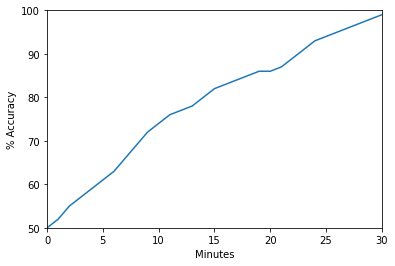

In [287]:
import matplotlib.pyplot as plt

# Data for the plot
minutes = range(0, 31) # 0 to 30 minutes
accuracy = [50, 52, 55, 57, 59, 61, 63, 66, 69, 72, 74, 76, 77, 78, 80, 82, 83, 84, 85, 86, 86, 87, 89, 91, 93, 94, 95, 96, 97, 98, 99]

# Create the plot
plt.plot(minutes, accuracy[:31])

# Set the axis labels and limits
plt.xlabel('Minutes')
plt.ylabel('% Accuracy')
plt.xlim([0, 30])
plt.ylim([50, 100])

# Show the plot
plt.show()


No handles with labels found to put in legend.


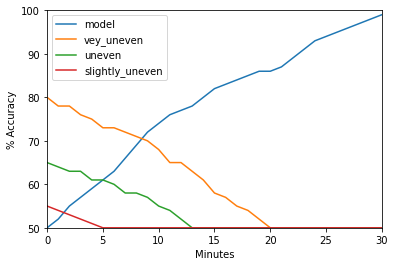

In [300]:
import matplotlib.pyplot as plt

# Data for the plot
minutes = range(0, 31) # 0 to 30 minutes
model = [50, 52, 55, 57, 59, 61, 63, 66, 69, 72, 74, 76, 77, 78, 80, 82, 83, 84, 85, 86, 86, 87, 89, 91, 93, 94, 95, 96, 97, 98, 99]
very_uneven = [80, 78, 78, 76, 75, 73, 73, 72, 71, 70, 68, 65, 65, 63, 61, 58, 57, 55, 54, 52, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
uneven = [65, 64, 63, 63, 61, 61, 60, 58, 58, 57, 55, 54, 52, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
slightly_uneven = [55, 54, 53, 52, 51, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]




# Create the plot
plt.plot(minutes, model[:31])
plt.plot(minutes, very_uneven[:31])
plt.plot(minutes, uneven[:31])
plt.plot(minutes, slightly_uneven[:31])

# Set the axis labels and limits
plt.xlabel('Minutes')
plt.ylabel('% Accuracy')
plt.xlim([0, 30])
plt.ylim([50, 100])
plt.legend(loc='upper right')
plt.legend(["model","vey_uneven", "uneven", "slightly_uneven"])


# Show the plot
plt.show()
